# Reference genome testing - Normalization
Data should be normalized in order to compare cells because counts are affected by sequencing depth, gene length and cell cycle phase.
<br>

Standard:
Total-count normalize (library-size correct) the data matrix $\mathbf{X}$ to 10,000 reads per cell, so that counts become comparable among cells.
<br>


<div class="alert alert-warning">
    
**What this section (Normalization) does**
    
This section normalizes the data based on sequencing depth and gene length so the cells are comparable. Subsequently dimensional reduction and clustering are performed to visualize samples separately. The section contains the following subsections:

* Normalization <br>
* Dimensional reduction <br>
* Marker genes and property annotation visualizations <br>
</div>

### Loading libraries
Using sc2_seurat environment

In [102]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/hpc/hers_basak/bin/miniconda3/envs/sc2_seurat/bin/python
3.9.9 | packaged by conda-forge | (main, Dec 20 2021, 02:40:17) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=9, releaselevel='final', serial=0)


In [103]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))#embed HTML within IPython notebook and make containers 90% of screen
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white') #figure resolution and background color

# This is used
# os.path.join('data/'+object_names[i][6:10]+'_preprocessed.h5ad')
#sc.logging.print_versions()

## Load data
The filtered .h5ad  files from preprocessing section.

In [104]:
#old (ensemble 93)
old_filtered = '/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_reference_testing/data/CNR0176487_old_filtered_1.h5ad' 

#new (ensemble 98)
new_filtered = '/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_reference_testing/data/CNR0176487_new_filtered_1.h5ad' 


In [105]:
#set data path
os.chdir('/home/hers_basak/jjiang/jack/outputs/deliverables/0_reference_testing/data')

In [106]:
os.getcwd()

'/hpc/hers_basak/rnaseq_data/Basaklab/jjiang/outputs/deliverables/0_reference_testing/data'

In [107]:
!ls

CNR0176487_new_filtered_1.h5ad	  CNR0176487_old_preprocessed.h5ad
CNR0176487_new_preprocessed.h5ad  CNR0176487_old_processed.h5ad
CNR0176487_new_processed.h5ad	  CNR01764_reg_processed.h5ad
CNR0176487_old_filtered_1.h5ad	  figures


In [108]:
files = [old_filtered, new_filtered]

In [109]:
names = [name.split('_filtered')[0].split('/data/')[1] for name in files ]
print(names)

['CNR0176487_old', 'CNR0176487_new']


In [110]:
object_names_filtered=list()
numberobj = len(files)

for i in range(numberobj):
    object_names_filtered.append("adata"+"_"+names[i]+"_"+"filtered")
    locals()[object_names_filtered[i]] = sc.read(files[i]) 
    print(object_names_filtered[i],' is loaded')

adata_CNR0176487_old_filtered  is loaded
adata_CNR0176487_new_filtered  is loaded


## Normalization

In [111]:
for i in range(numberobj):
    print(locals()[object_names_filtered[i]].X)

  (0, 0)	5.0
  (0, 15)	1.0
  (0, 22)	3.0
  (0, 29)	2.0
  (0, 38)	2.0
  (0, 40)	1.0
  (0, 41)	1.0
  (0, 57)	1.0
  (0, 61)	1.0
  (0, 64)	1.0
  (0, 71)	2.0
  (0, 106)	2.0
  (0, 108)	4.0
  (0, 120)	1.0
  (0, 123)	10.0
  (0, 136)	2.0
  (0, 144)	2.0
  (0, 145)	1.0
  (0, 212)	2.0
  (0, 214)	2.0
  (0, 225)	1.0
  (0, 229)	1.0
  (0, 288)	2.0
  (0, 297)	6.0
  (0, 307)	1.0
  :	:
  (5299, 30599)	1.0
  (5299, 30612)	1.0
  (5299, 30633)	1.0
  (5299, 30685)	4.0
  (5299, 30701)	1.0
  (5299, 30724)	1.0
  (5299, 30743)	1.0
  (5299, 30756)	1.0
  (5299, 30760)	1.0
  (5299, 30776)	1.0
  (5299, 30781)	1.0
  (5299, 30790)	1.0
  (5299, 30802)	2.0
  (5299, 30806)	1.0
  (5299, 30808)	1.0
  (5299, 30835)	1.0
  (5299, 30845)	1.0
  (5299, 30855)	2.0
  (5299, 30877)	1.0
  (5299, 30895)	1.0
  (5299, 30905)	1.0
  (5299, 30912)	1.0
  (5299, 30955)	2.0
  (5299, 30961)	1.0
  (5299, 31036)	2.0
  (0, 0)	5.0
  (0, 16)	1.0
  (0, 23)	3.0
  (0, 31)	2.0
  (0, 40)	2.0
  (0, 42)	1.0
  (0, 43)	1.0
  (0, 59)	1.0
  (0, 63)	1.0
  (0,

In [1]:
## Normalize and Logarithmize
for i in range(numberobj):
    sc.pp.normalize_total(locals()[object_names_filtered[i]], key_added='total_counts_norm')
    locals()[object_names_filtered[i]].raw = locals()[object_names_filtered[i]].copy()
    sc.pp.log1p(locals()[object_names_filtered[i]])
    print(object_names_filtered[i], ' has been normalized and logarithmized')

NameError: name 'numberobj' is not defined

In [113]:
for i in range(numberobj):
    print(locals()[object_names_filtered[i]].X)

  (0, 0)	1.8271438
  (0, 15)	0.71452767
  (0, 22)	1.4181961
  (0, 29)	1.1270192
  (0, 38)	1.1270192
  (0, 40)	0.71452767
  (0, 41)	0.71452767
  (0, 57)	0.71452767
  (0, 61)	0.71452767
  (0, 64)	0.71452767
  (0, 71)	1.1270192
  (0, 106)	1.1270192
  (0, 108)	1.6434307
  (0, 120)	0.71452767
  (0, 123)	2.4364352
  (0, 136)	1.1270192
  (0, 144)	1.1270192
  (0, 145)	0.71452767
  (0, 212)	1.1270192
  (0, 214)	1.1270192
  (0, 225)	0.71452767
  (0, 229)	0.71452767
  (0, 288)	1.1270192
  (0, 297)	1.9822873
  (0, 307)	0.71452767
  :	:
  (5299, 30599)	0.80742747
  (5299, 30612)	0.80742747
  (5299, 30633)	0.80742747
  (5299, 30685)	1.7865007
  (5299, 30701)	0.80742747
  (5299, 30724)	0.80742747
  (5299, 30743)	0.80742747
  (5299, 30756)	0.80742747
  (5299, 30760)	0.80742747
  (5299, 30776)	0.80742747
  (5299, 30781)	0.80742747
  (5299, 30790)	0.80742747
  (5299, 30802)	1.2482572
  (5299, 30806)	0.80742747
  (5299, 30808)	0.80742747
  (5299, 30835)	0.80742747
  (5299, 30845)	0.80742747
  (5299, 3085

### Identify highly-variable genes
This step is important to choose the feature that will be used for dimensionality reduction ()

In [114]:
for i in range(numberobj): 
    sc.pp.highly_variable_genes(locals()[object_names_filtered[i]], min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat') #seurat_v3 is giving an error
    print('worked')

worked
worked


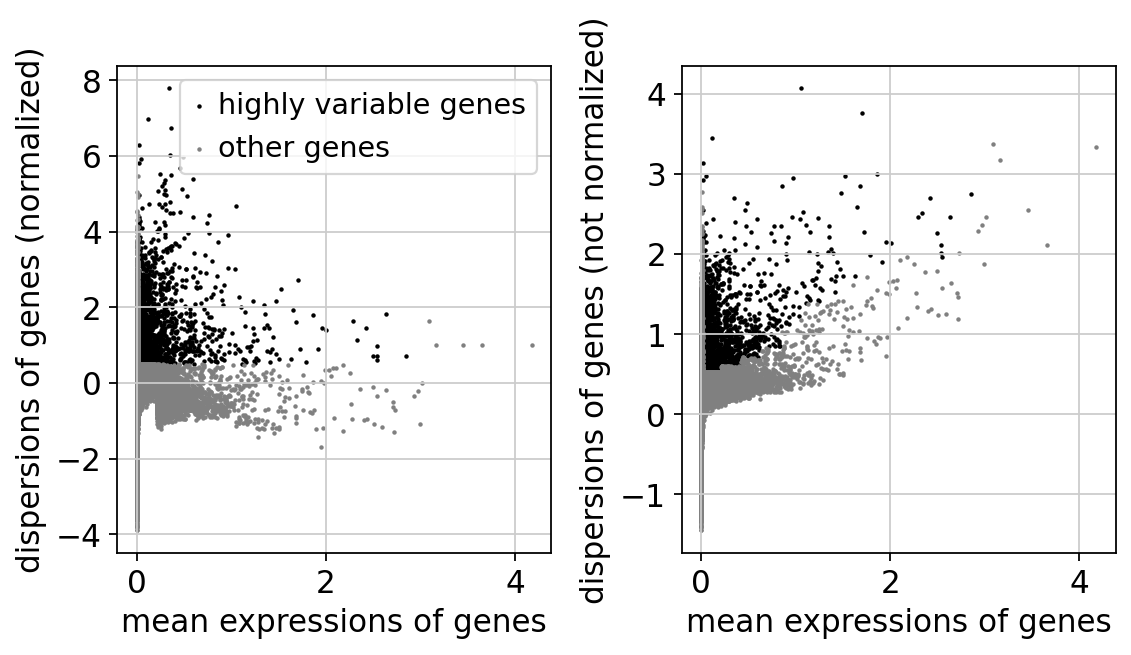

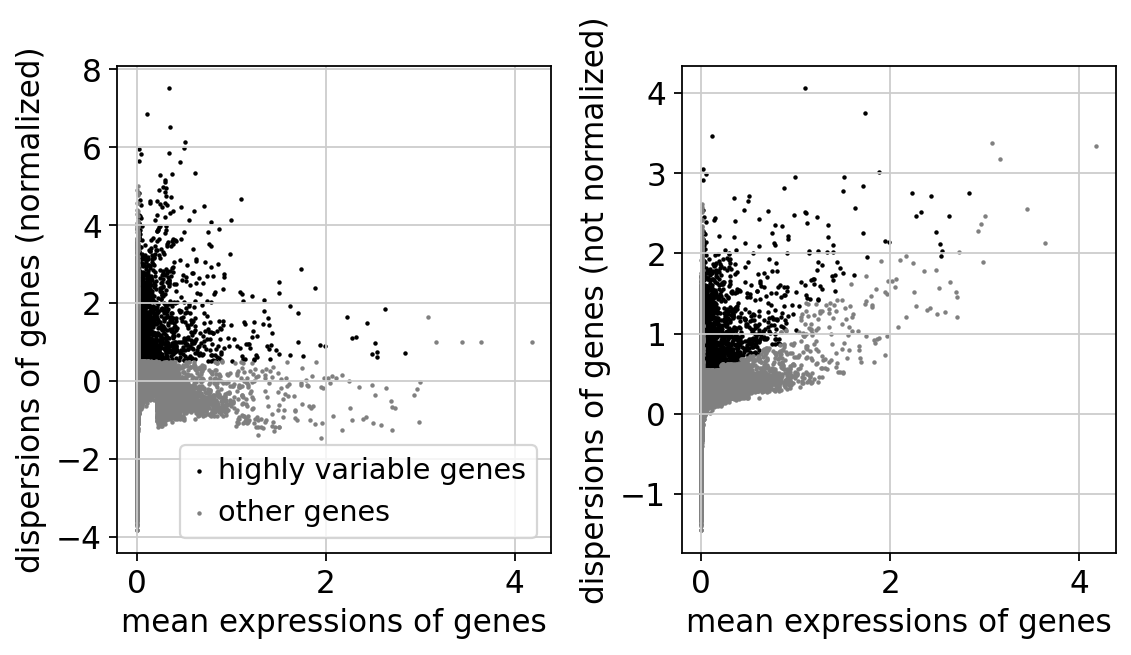

In [115]:
for i in range(numberobj): 
    sc.pl.highly_variable_genes(locals()[object_names_filtered[i]])

### regress and scale
We will compare data regressed for the number of counts and scaled to unprocessed data. It is better to do the least possible. This also saves from memory and disk space. Still, if the number of counts influence the embedding, we need to correct for this \
Note: You could skip filtering for highly variable genes only if you dont need to regress and scale
https://github.com/theislab/single-cell-tutorial/issues/35

In [116]:
for i in range(numberobj):
    locals()[object_names_filtered[i]+"_reg"] = locals()[object_names_filtered[i]].copy()
    locals()[object_names_filtered[i]+"_reg"].raw = locals()[object_names_filtered[i]+"_reg"]
    locals()[object_names_filtered[i]+"_reg"] = locals()[object_names_filtered[i]+"_reg"][:, locals()[object_names_filtered[i]+"_reg"].var['highly_variable']]
    sc.pp.regress_out(locals()[object_names_filtered[i]+"_reg"], ['total_counts']) # previously, we regreesed 'n_counts_filtered','percent_mito'
    sc.pp.scale(locals()[object_names_filtered[i]+"_reg"], max_value=10)

In [117]:
object_names_reg = list()
numberobj = len(files)
for i in range(numberobj):
    object_names_reg.append(object_names_filtered[i]+"_reg")

In [118]:
object_names_reg

['adata_CNR0176487_old_filtered_reg', 'adata_CNR0176487_new_filtered_reg']

# Dimensional Reduction

In [25]:
#To make reproducible plots
np.random.seed(1981)

### Principal component analysis
Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

In [120]:
for i in range(numberobj):
    sc.tl.pca(locals()[object_names_filtered[i]], svd_solver='arpack')
#    sc.tl.pca(locals()[object_names_reg[i]], svd_solver='arpack')

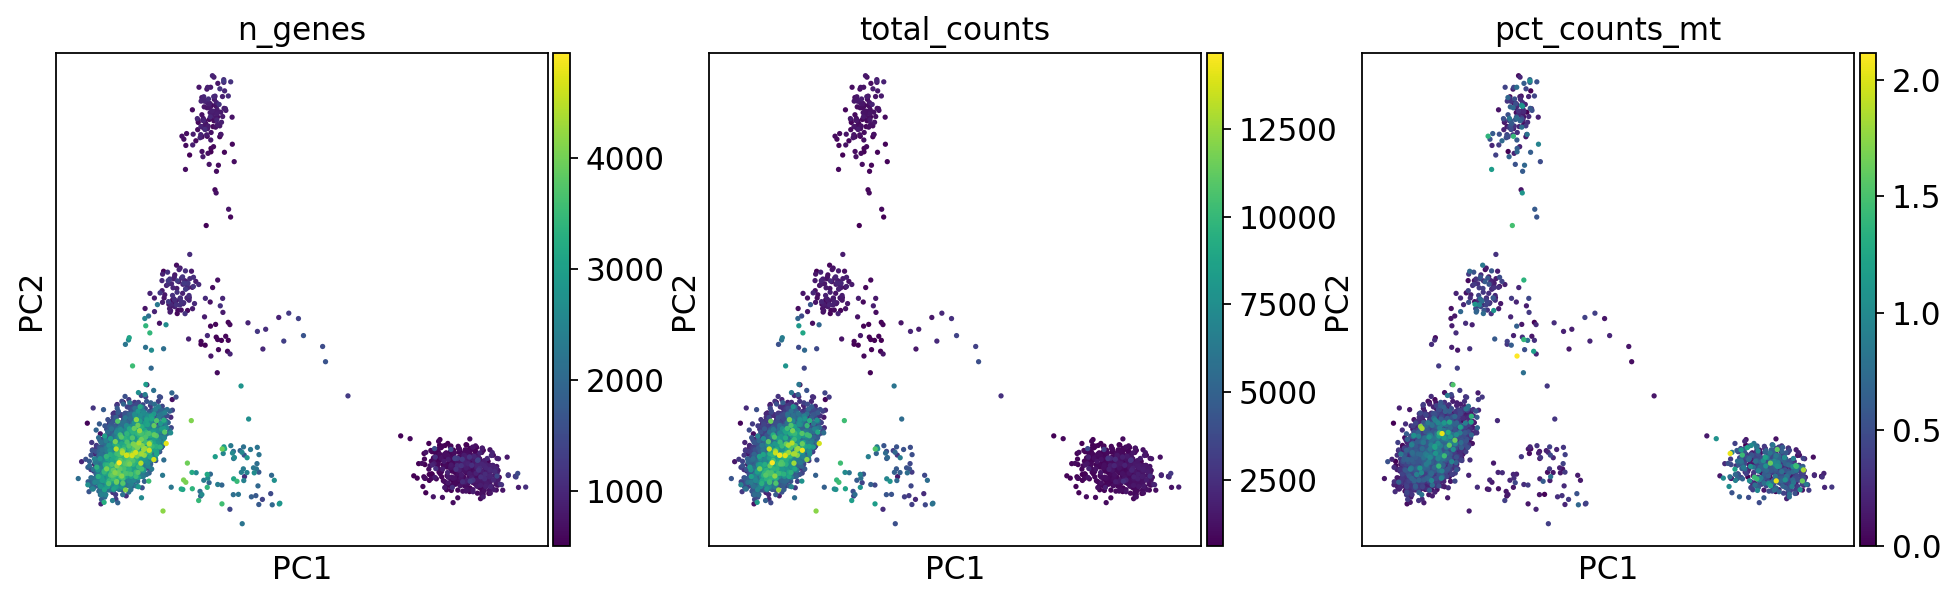

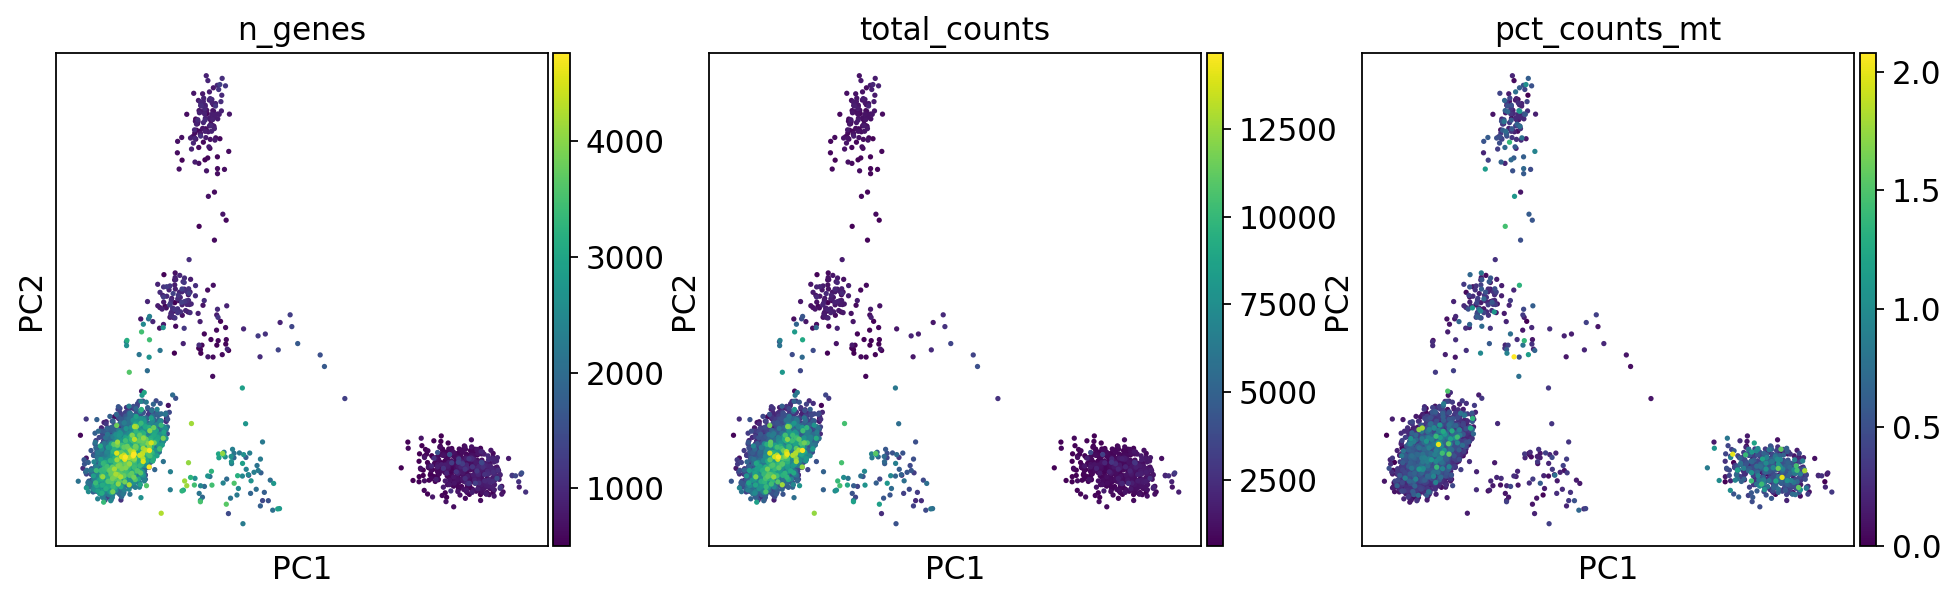

In [121]:
for i in range(numberobj):
    sc.pl.pca(locals()[object_names_filtered[i]], color=['n_genes', 'total_counts', 'pct_counts_mt'], save = "_"+object_names_filtered[i]+"_intron_metrics_1.pdf")
#    sc.pl.pca(locals()[object_names_reg[i]], color=['n_genes', 'total_counts', 'pct_counts_mt'], save = "_"+object_names_reg[i]+"_intron_metrics_1.pdf")


In [122]:
for i in range(numberobj):
    sc.tl.pca(locals()[object_names_reg[i]], svd_solver='arpack')

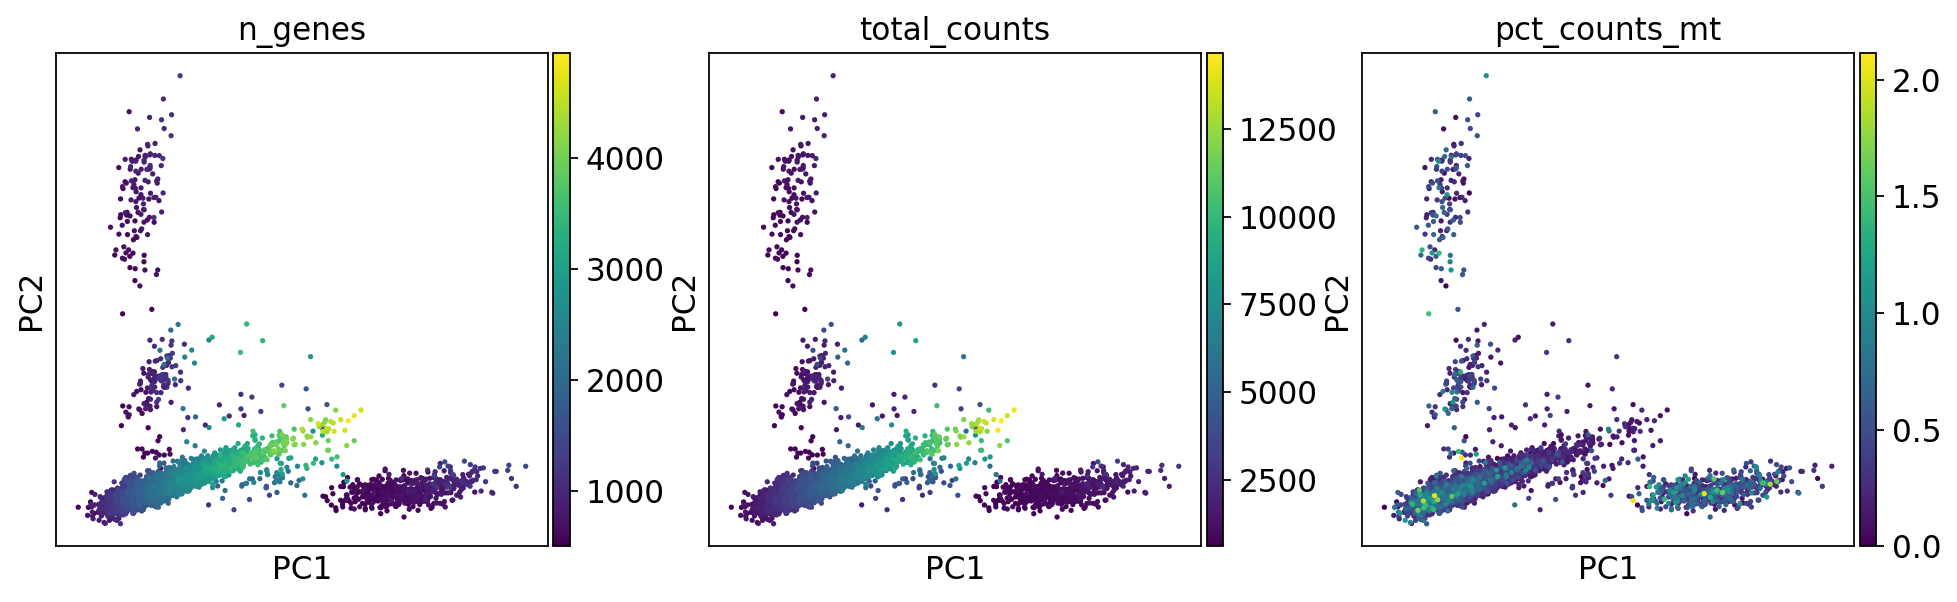

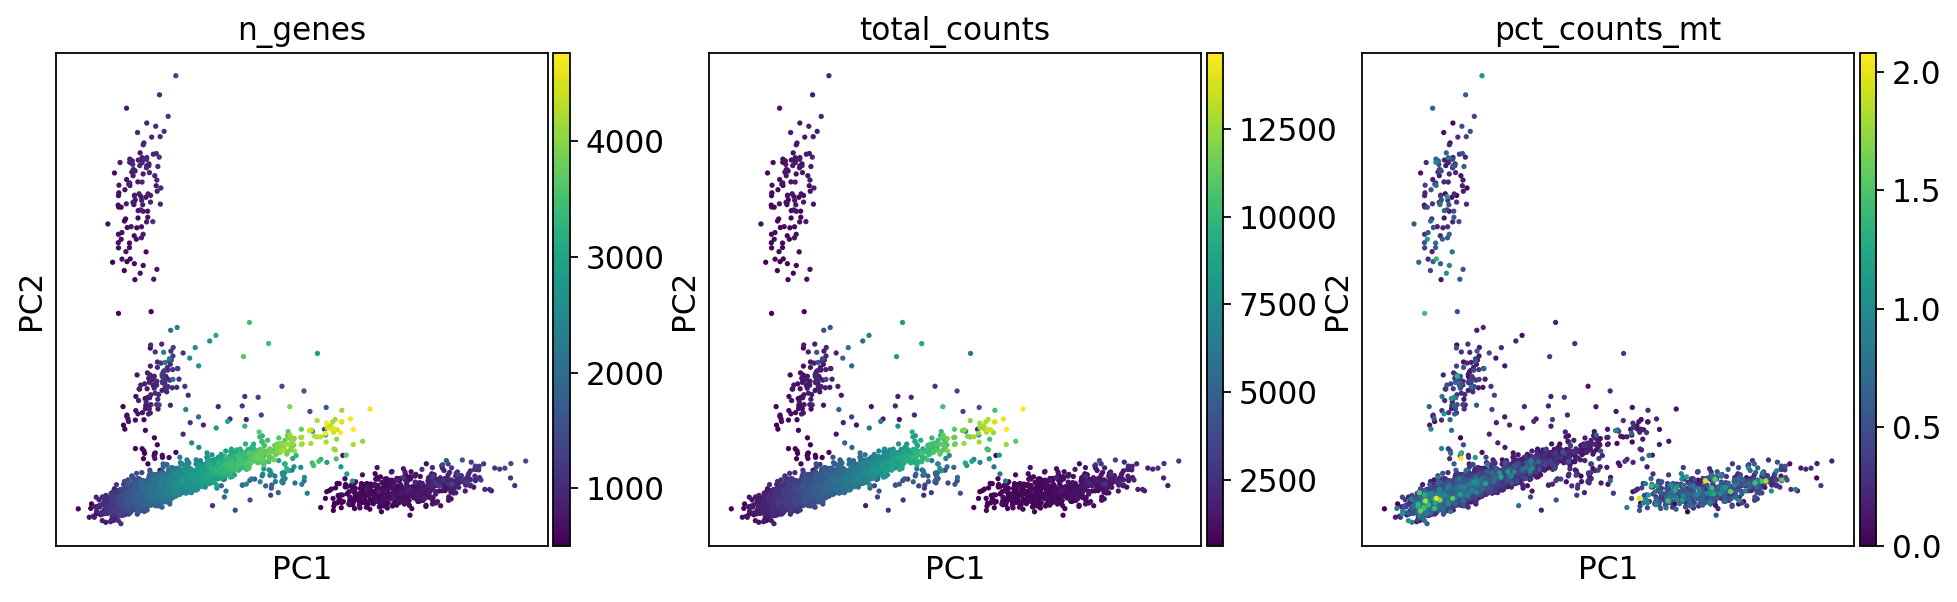

In [123]:
for i in range(numberobj):
    sc.pl.pca(locals()[object_names_reg[i]], color=['n_genes', 'total_counts', 'pct_counts_mt'], save = "_"+object_names_reg[i]+"_intron_metrics_1.pdf")

**Visualizing cells with marker genes:**<br>
Gfap: Astrocytes <br>
Plp1: myelin proteolipid protein, oligodendritic glial sheaths<br>
Rbfox3: post-mitotic neurons<br>
Gad1: GABAergic neuronal marker (extrasynaptic and metabolic purposes)<br>
Gad2: GABAergic neuronal marker (regulate vesicular pool for release)<br>
Slc17a6: glutamatergic neurons (with Th colocalize VTA)<br>
Th: Dopaminergic neurons<br>
Pecam1: Endothelial cells<br>
P2ry12: Microglia<br>

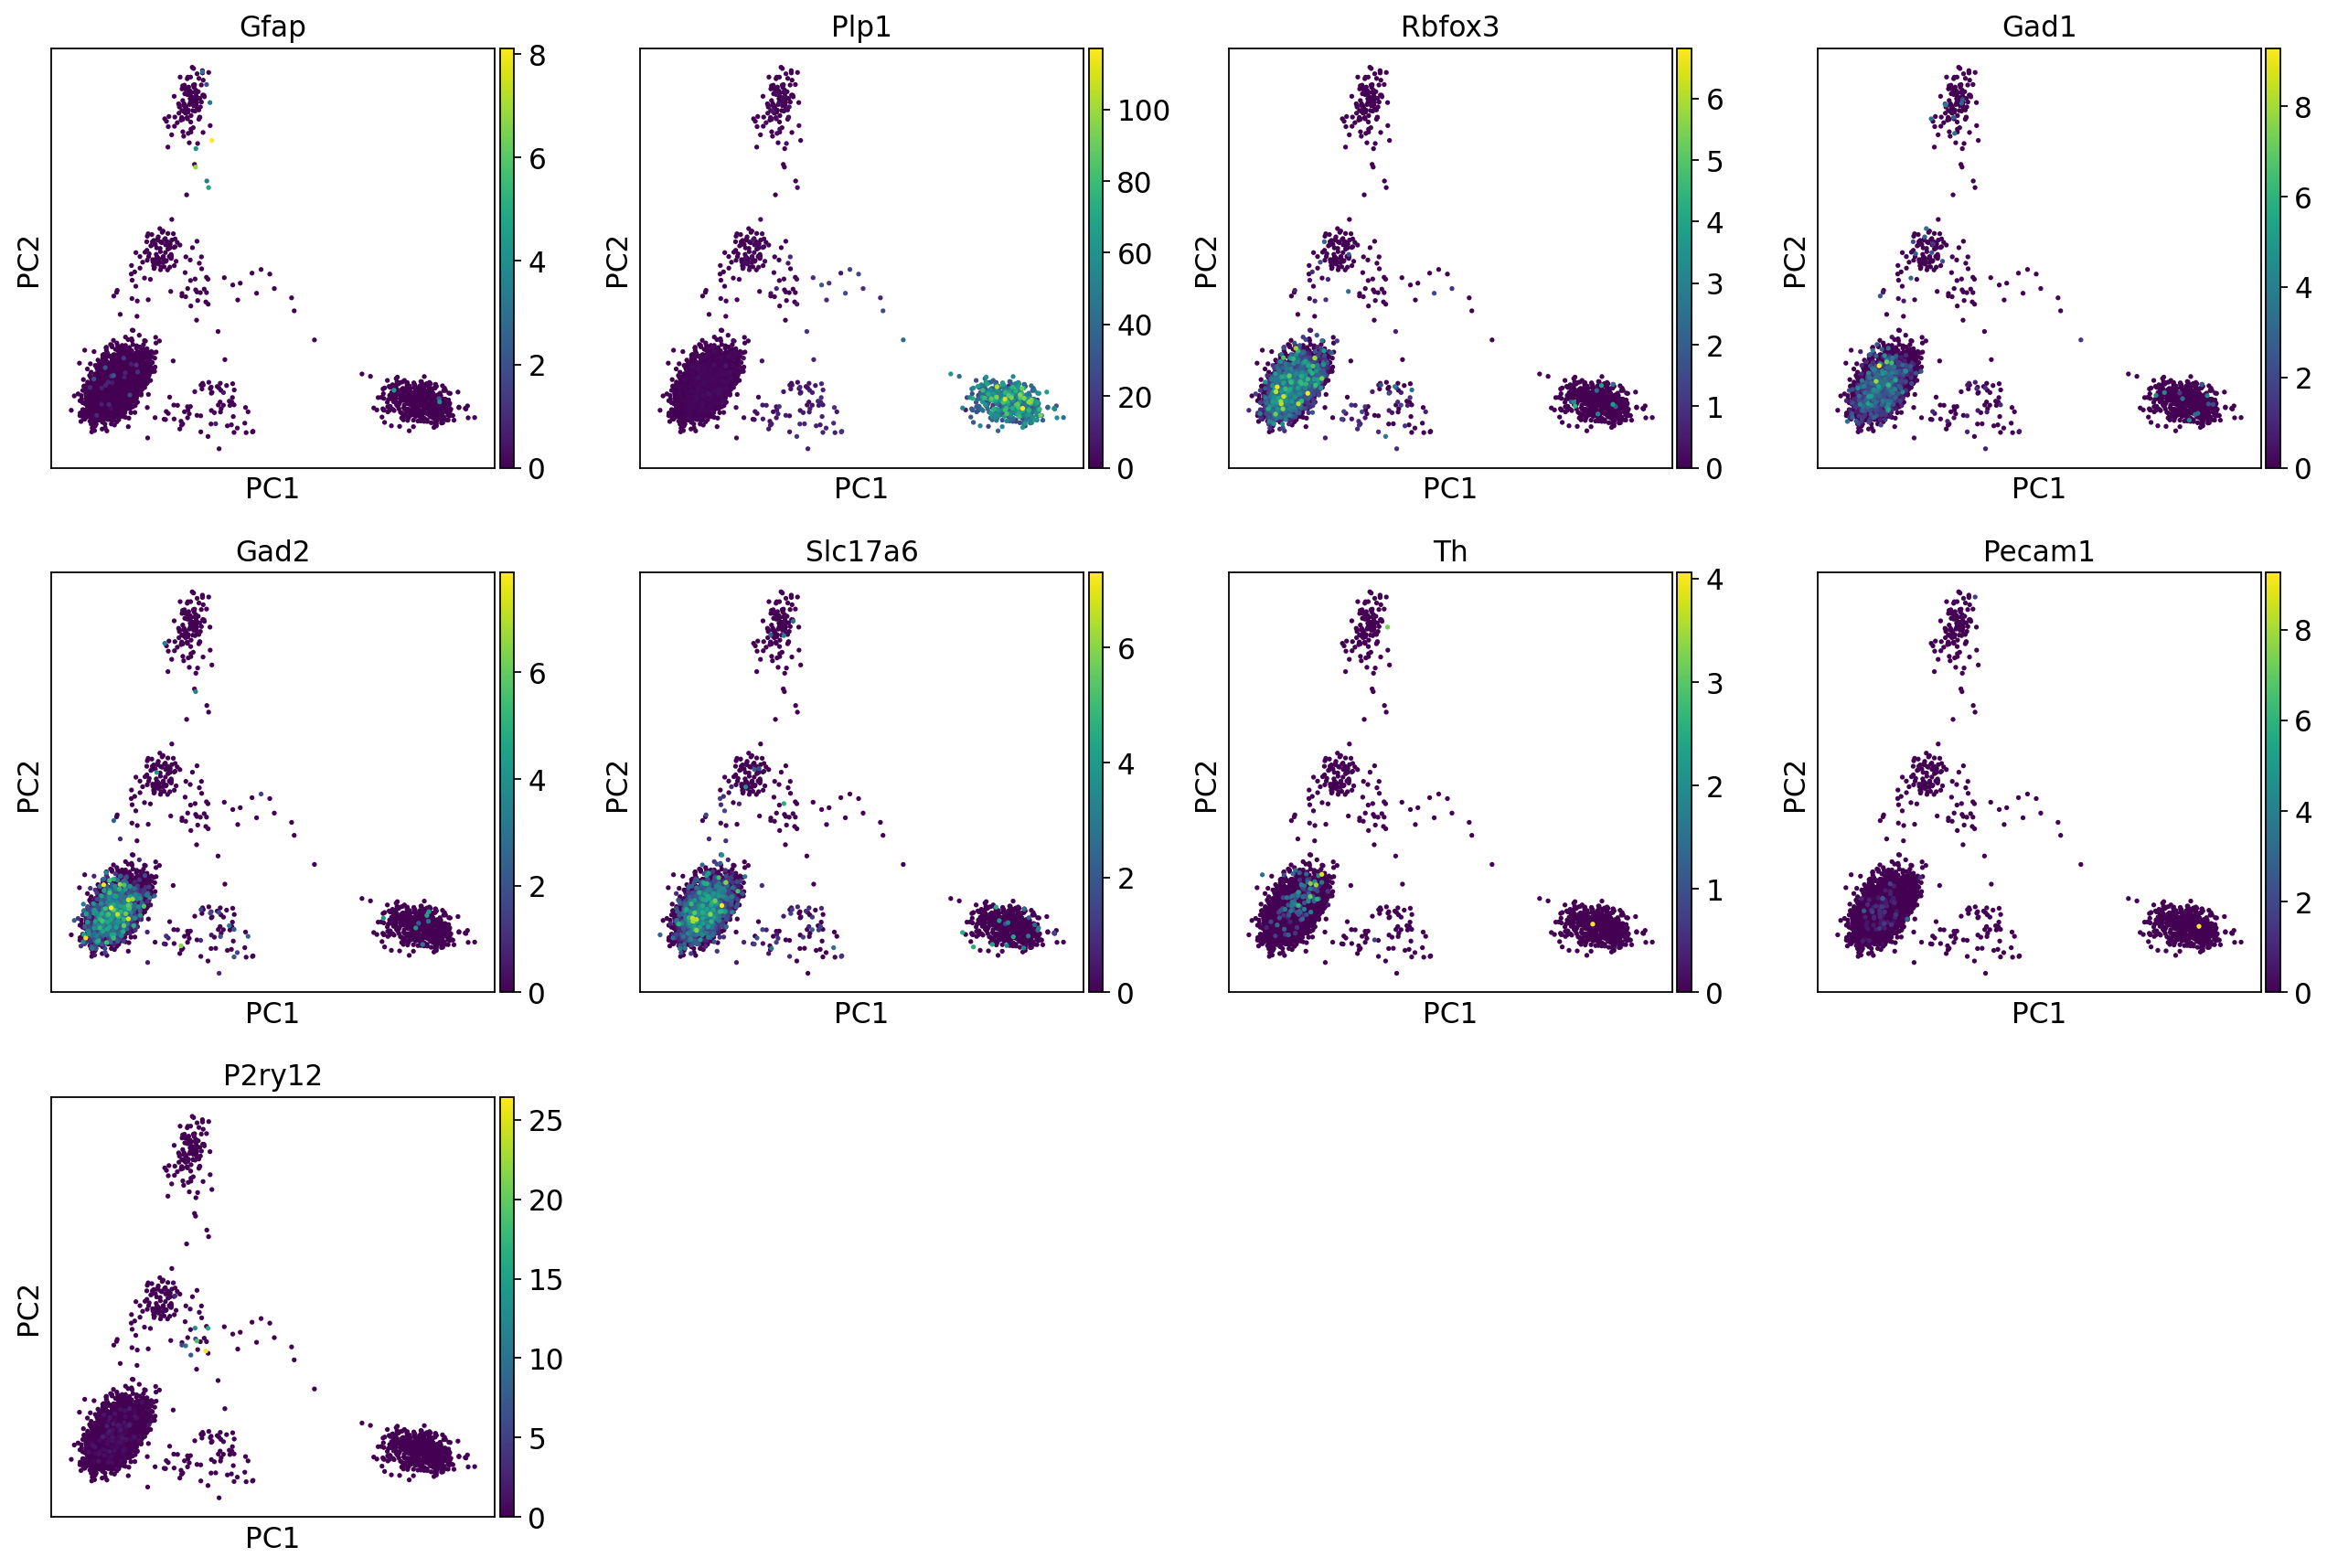

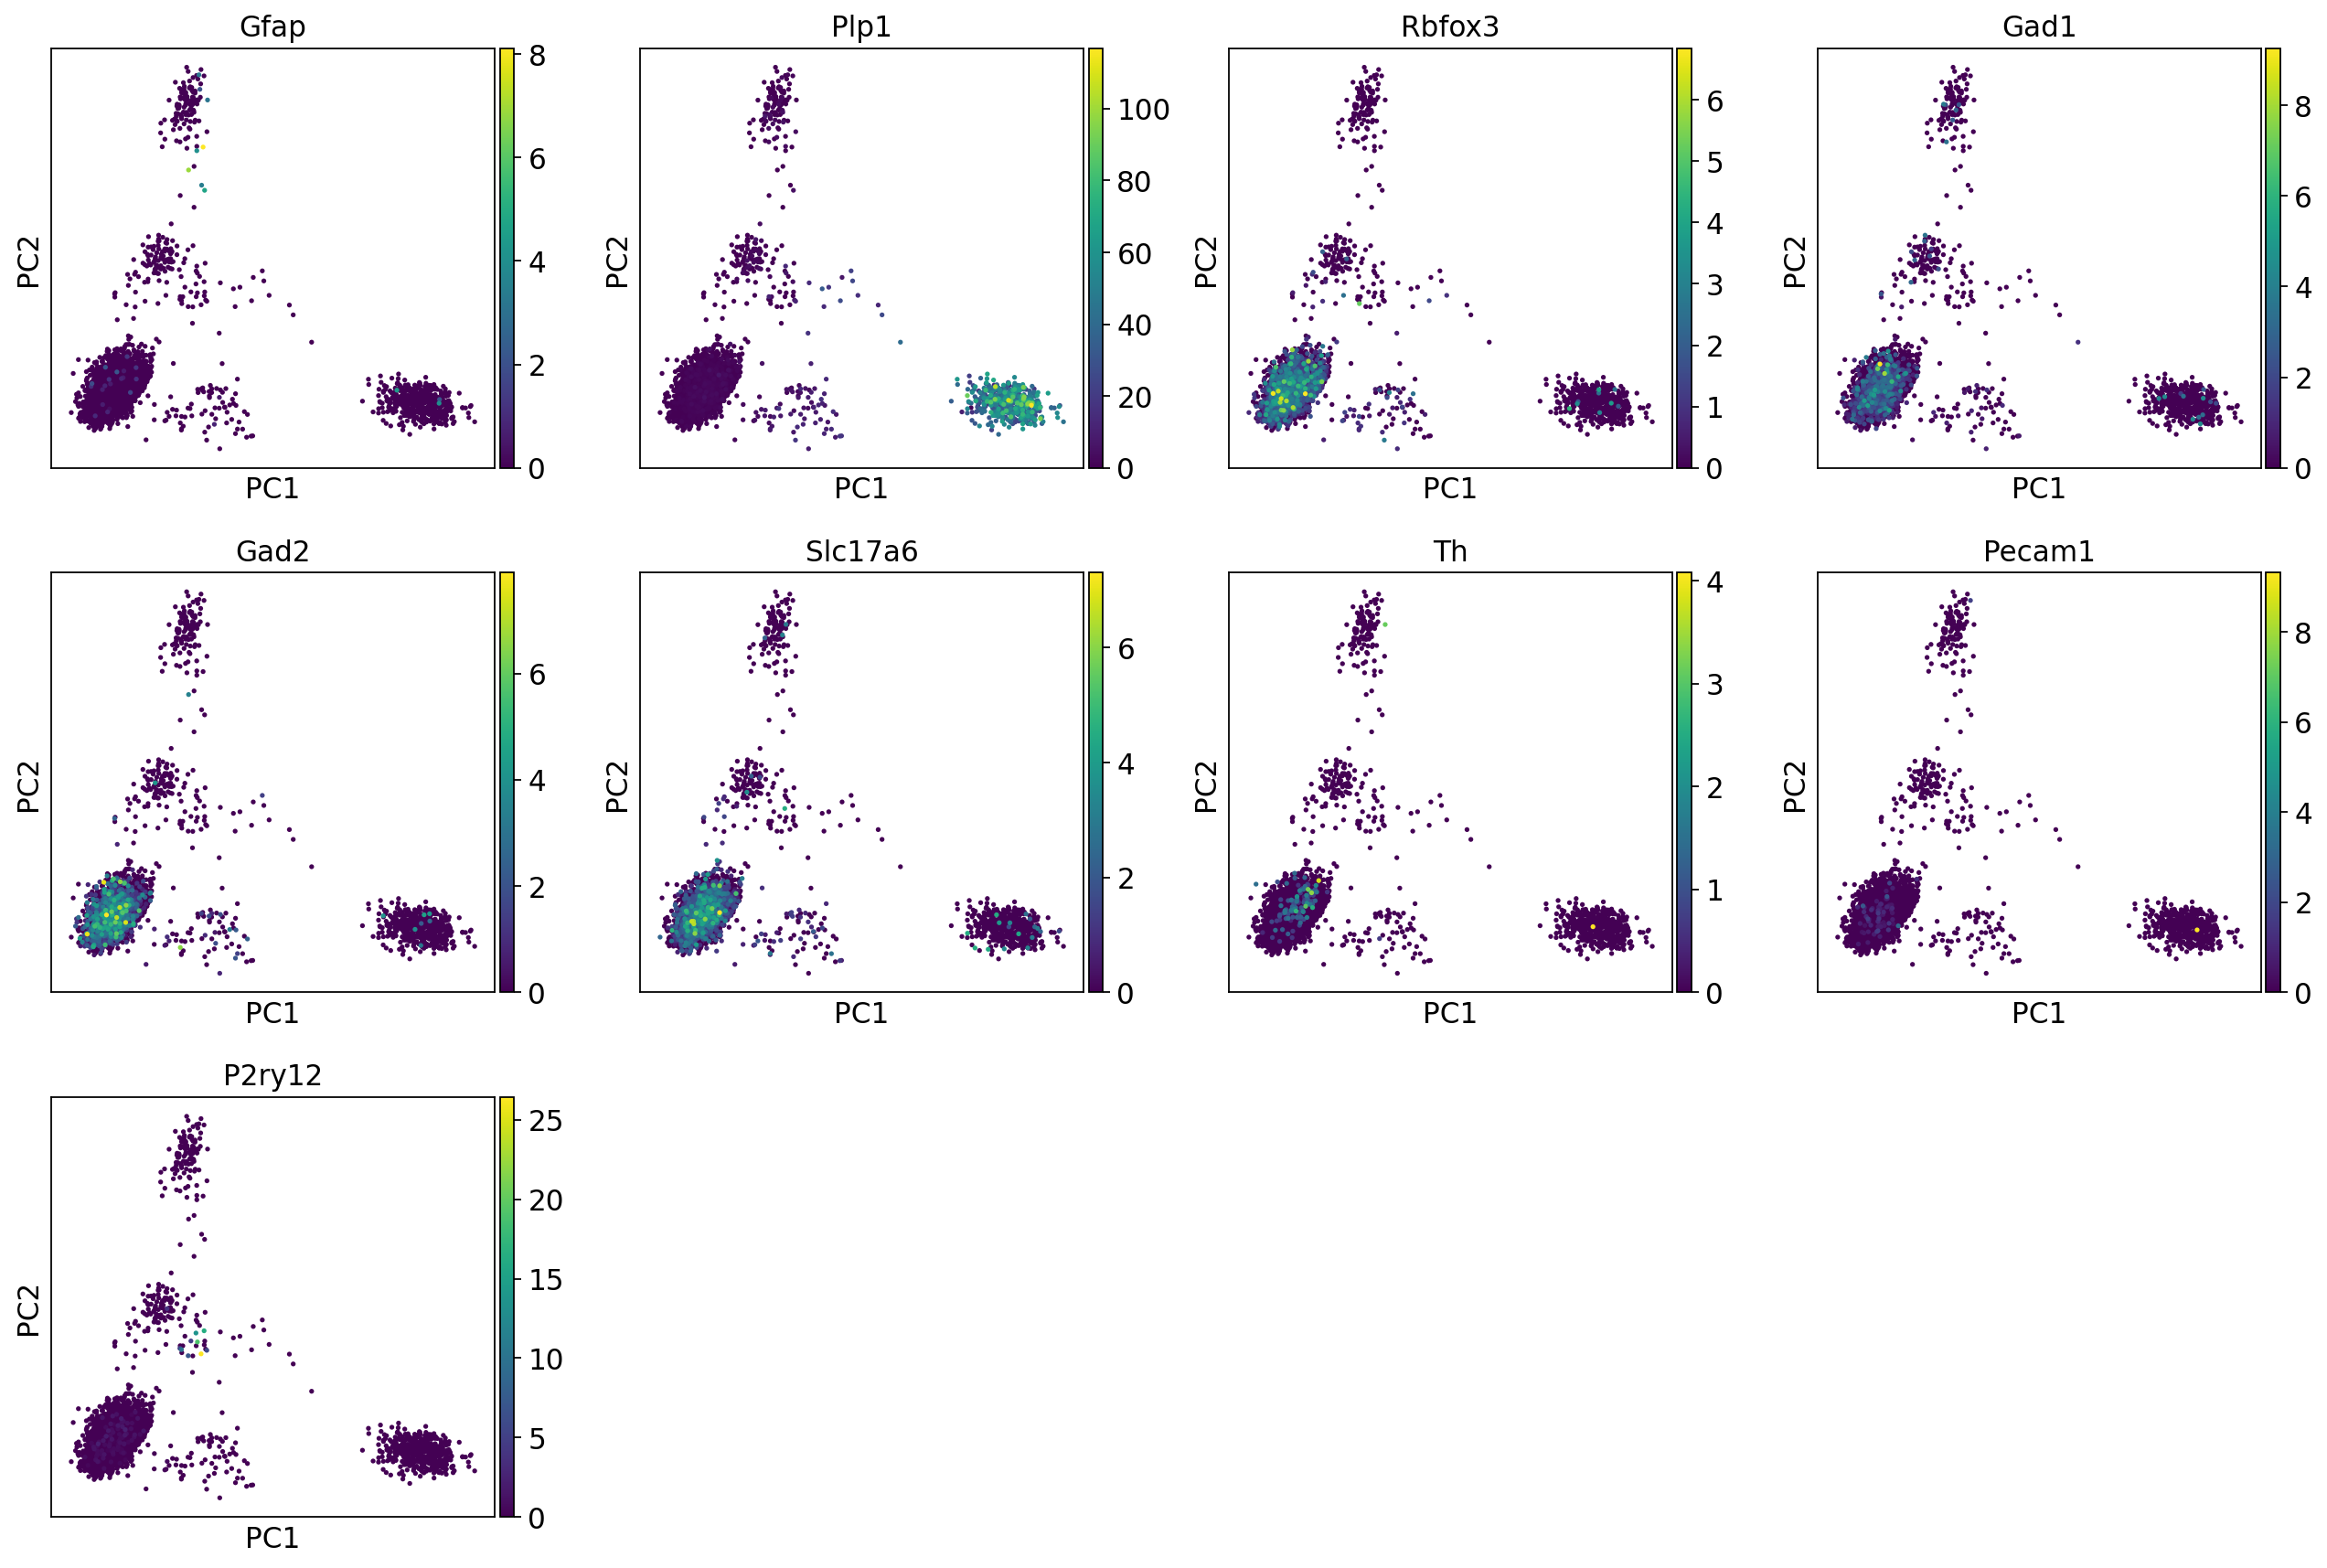

In [124]:
for i in range(numberobj):
    if locals()[object_names_filtered[i]].obs['species'][0] == 'Homo sapien':
        sc.pl.pca(locals()[object_names_filtered[i]], color=['GFAP', 'PLP1', 'RBFOX3','GAD1','GAD2', 'SLC17A6','STMN1','TMEM119'], 
                save = "_"+object_names_filtered[i]+"_metrics_2.pdf") # title =object_names[i],
#        sc.pl.pca(locals()[object_names_reg[i]], color=['GFAP', 'PLP1', 'RBFOX3','GAD1','GAD2', 'SLC17A6','STMN1'], 
#                save = "_"+object_names_reg[i]+"_metrics_2.pdf") #title =object_names[i],
    elif locals()[object_names_filtered[i]].obs['species'][0] == 'Mus musculus':
        sc.pl.pca(locals()[object_names_filtered[i]], color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2','Slc17a6','Th','Pecam1','P2ry12' ], 
                save = "_"+object_names_filtered[i]+"_metrics_2.pdf") #title =object_names_reg[i], 
#        sc.pl.pca(locals()[object_names_reg[i]], color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2', 'Slc17a6','Th'], 
#                save = "_"+object_names_reg[i]+"_metrics_2.pdf") #title =object_names_reg[i], 


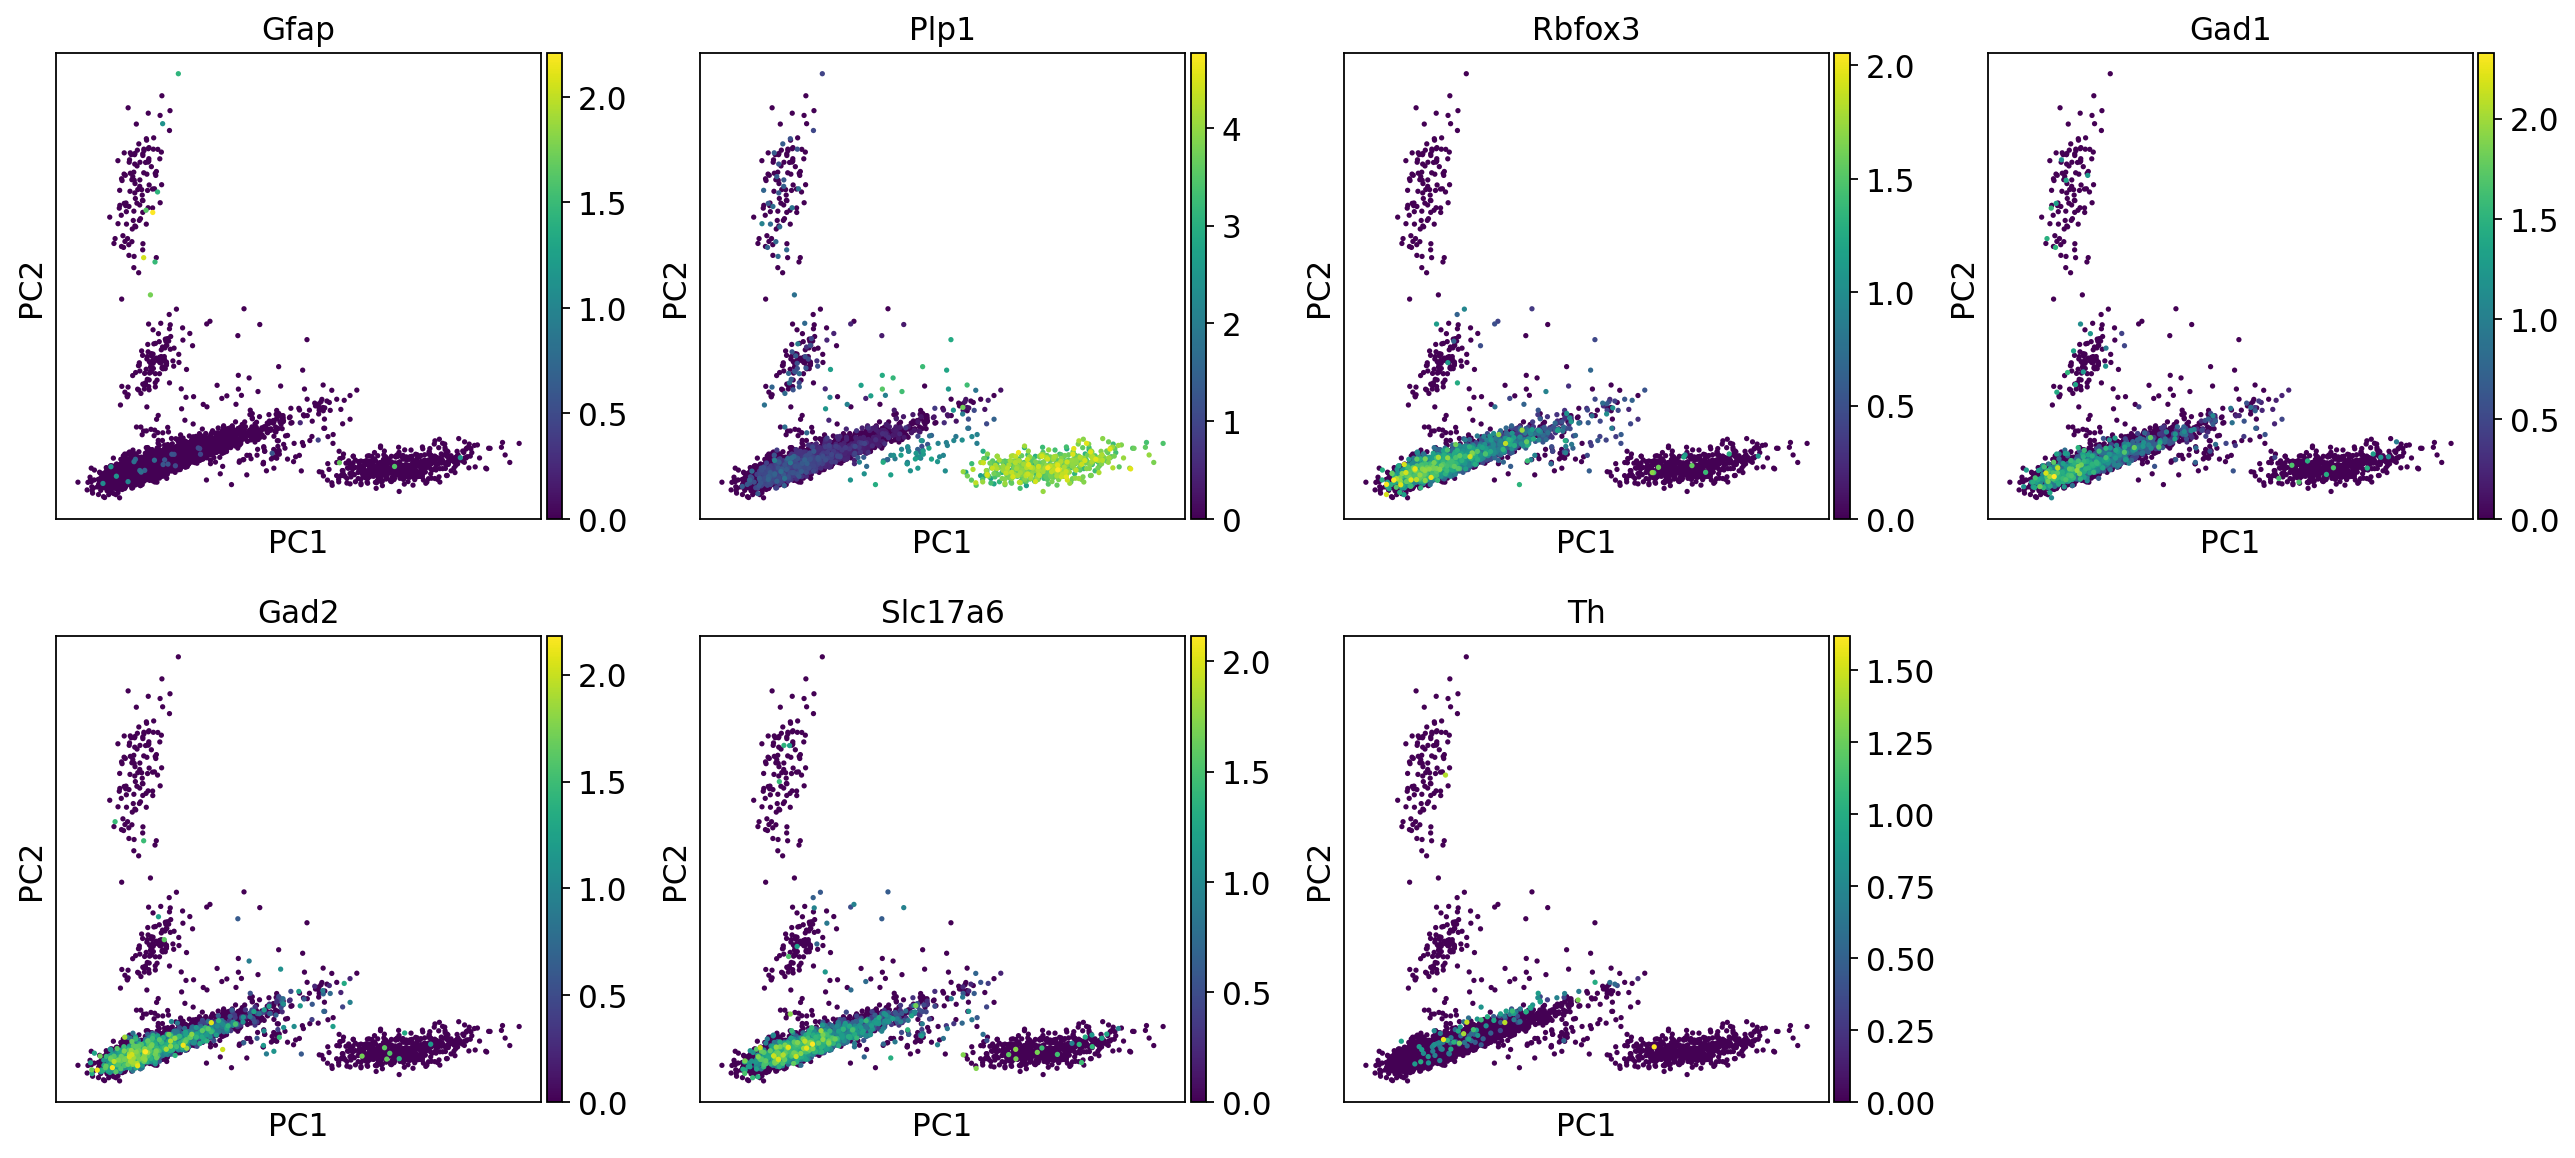

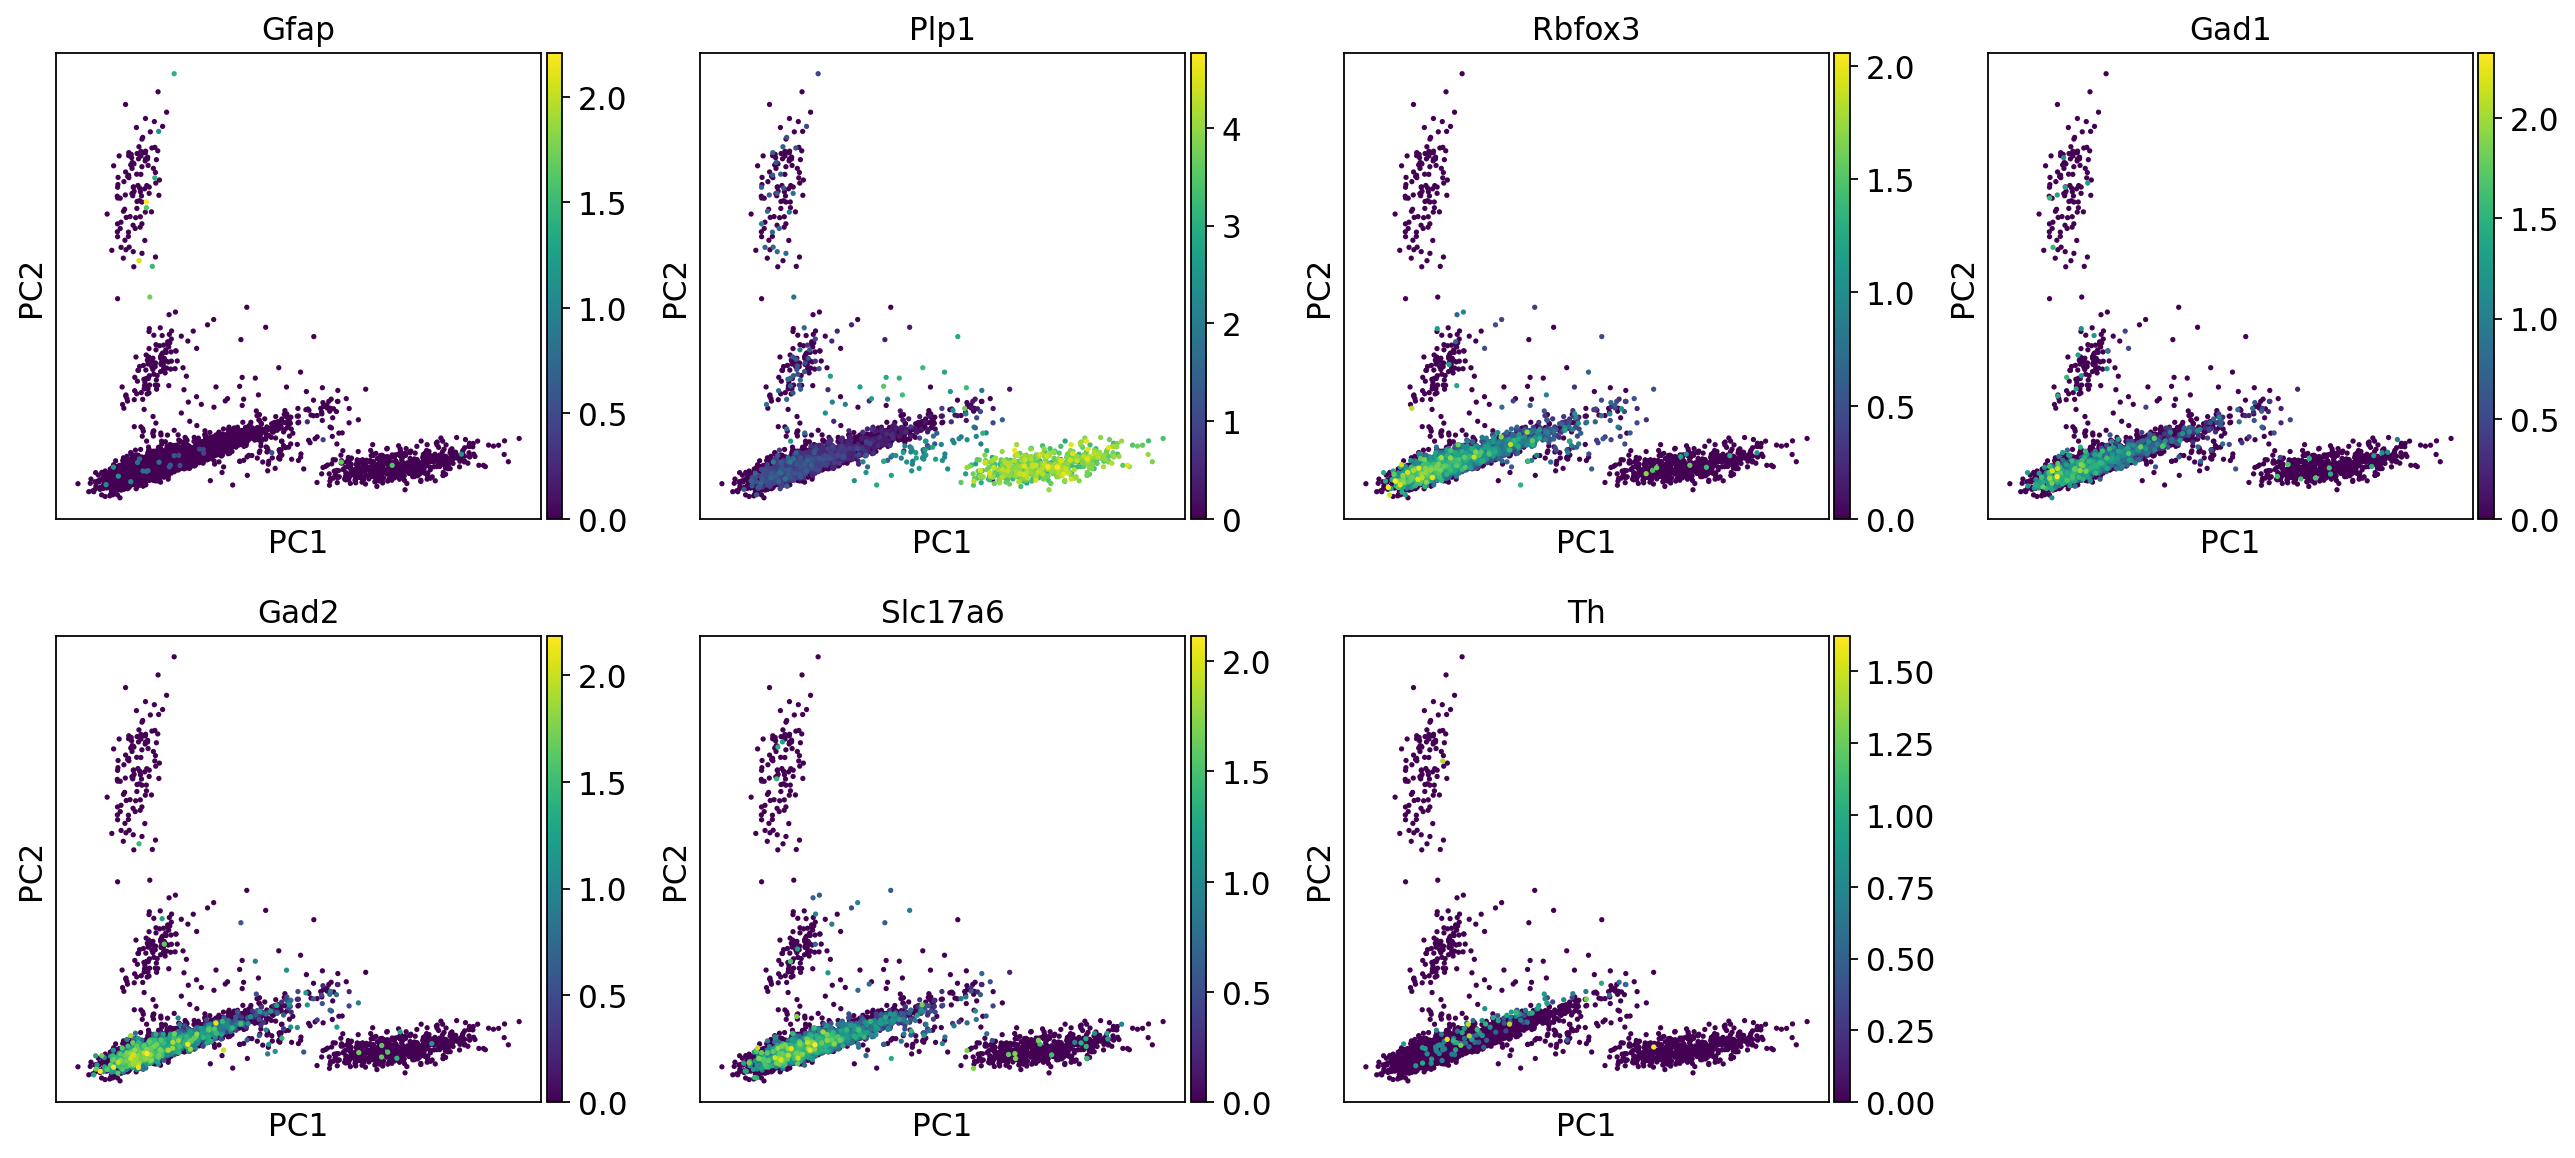

In [125]:
for i in range(numberobj):
    if locals()[object_names_filtered[i]].obs['species'][0] == 'Homo sapien':
        sc.pl.pca(locals()[object_names_filtered[i]], color=['GFAP', 'PLP1', 'RBFOX3','GAD1','GAD2', 'SLC17A6','STMN1'], 
                save = "_"+object_names_filtered[i]+"_metrics_2.pdf") # title =object_names[i],
#        sc.pl.pca(locals()[object_names_reg[i]], color=['GFAP', 'PLP1', 'RBFOX3','GAD1','GAD2', 'SLC17A6','STMN1'], 
#                save = "_"+object_names_reg[i]+"_metrics_2.pdf") #title =object_names[i],
    elif locals()[object_names_filtered[i]].obs['species'][0] == 'Mus musculus':
#        sc.pl.pca(locals()[object_names_filtered[i]], color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2','Slc17a6','Th'], 
#                save = "_"+object_names_filtered[i]+"_metrics_2.pdf") #title =object_names_reg[i], 
        sc.pl.pca(locals()[object_names_reg[i]], color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2', 'Slc17a6','Th'], 
                save = "_"+object_names_reg[i]+"_metrics_2.pdf") #title =object_names_reg[i], 


In [126]:
for i in range(numberobj):
    print(locals()[object_names_filtered[i]])

AnnData object with n_obs × n_vars = 5300 × 31040
    obs: 'species', 'gender', 'age', 'cngb_sample_id', 'sample_name', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts_no_mito', 'total_counts_norm'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
AnnData object with n_obs × n_vars = 5308 × 32272
    obs: 'species', 'gender', 'age', 'cngb_sample_id', 'sample_name', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_count

### UMAP

Let us compute the neighborhood graph of cells using the PCA representation of the data matrix. You might simply use default values here. \
We will run the following for quick analyses. Later, we will use some metrics to fing out the best dimensionality reduction parameters for UMAP and t-SNE. This is best done on merged datasets

In [43]:
nn = int(np.sqrt(len(locals()[object_names_filtered[i]])/2))
nn

51

In [130]:
nn= 15 #default 15
for i in range(numberobj):
    sc.pp.neighbors(locals()[object_names_filtered[i]], n_neighbors=nn, n_pcs=40)
    sc.pp.neighbors(locals()[object_names_reg[i]], n_neighbors=nn, n_pcs=40)
    sc.tl.umap(locals()[object_names_filtered[i]])
    sc.tl.umap(locals()[object_names_reg[i]])

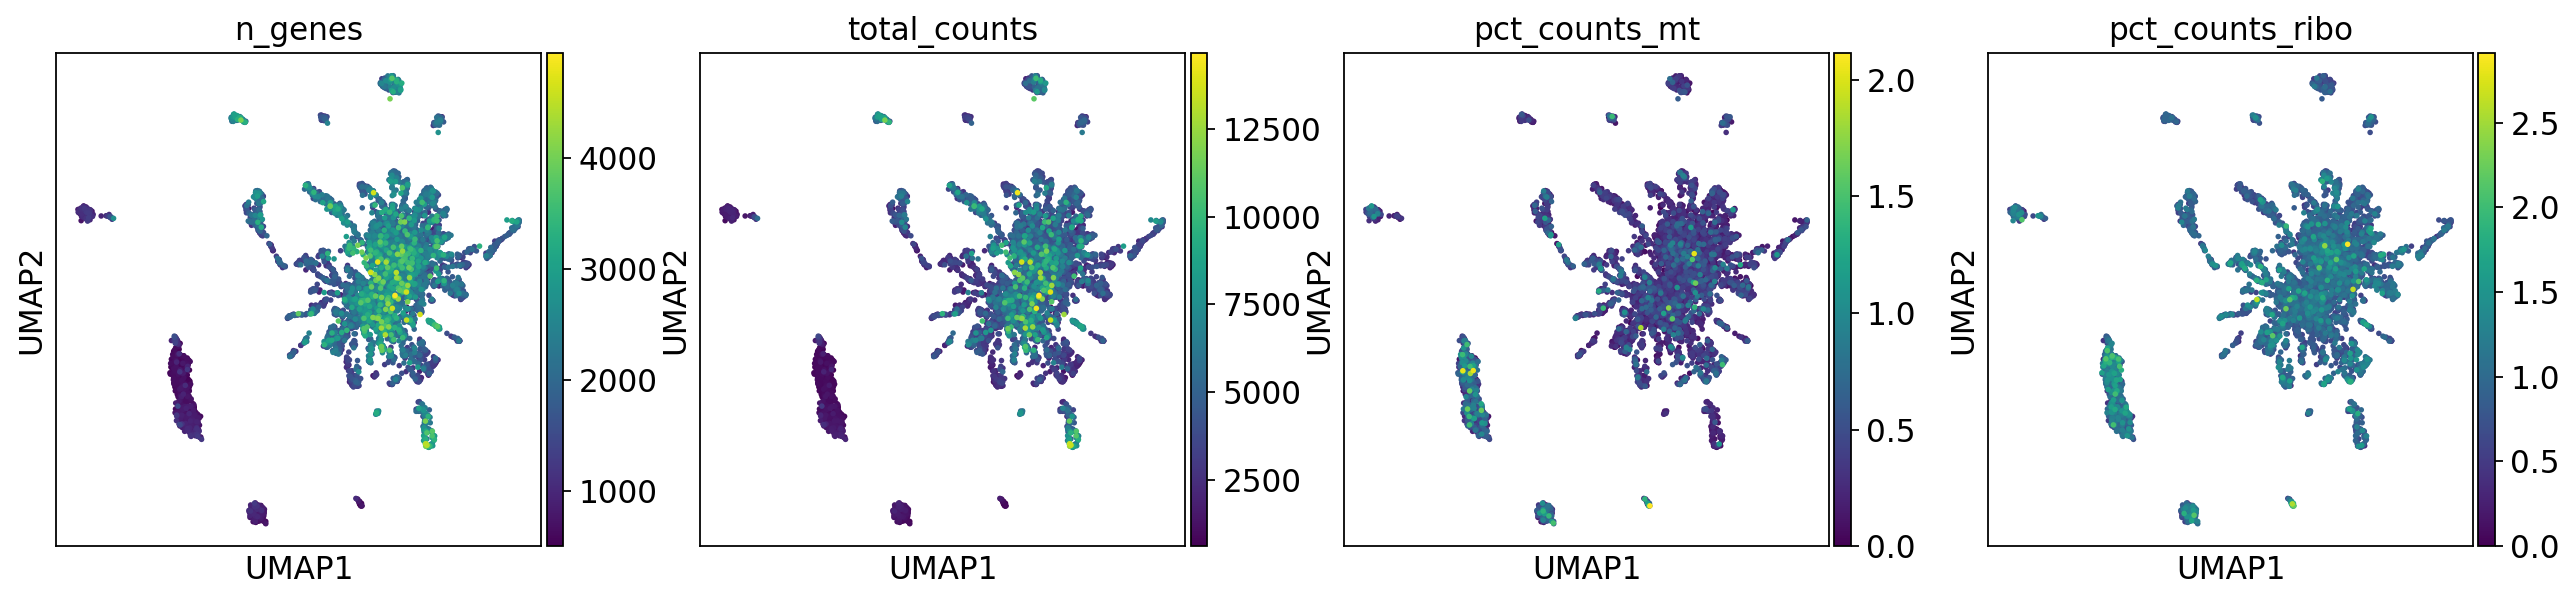

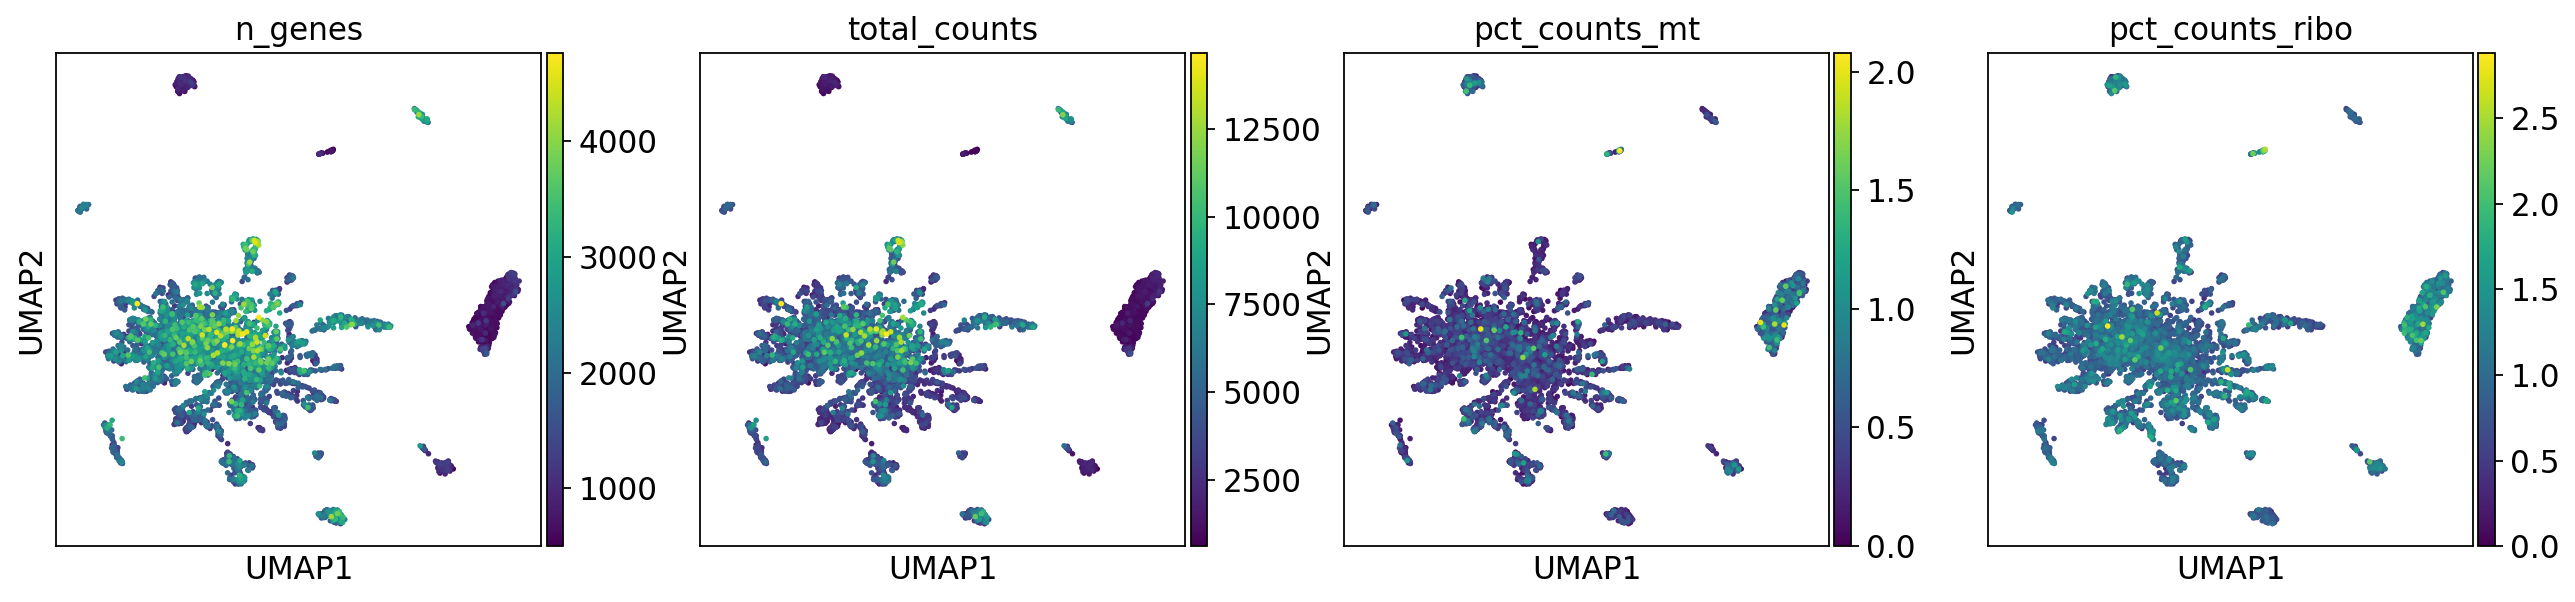

In [128]:
for i in range(numberobj):
    sc.pl.umap(locals()[object_names_filtered[i]], color=['n_genes', 'total_counts', 'pct_counts_mt','pct_counts_ribo'], use_raw=True, s=25,
           save = "_"+object_names_filtered[i]+"_umap_n"+str(nn)+"_1.pdf")

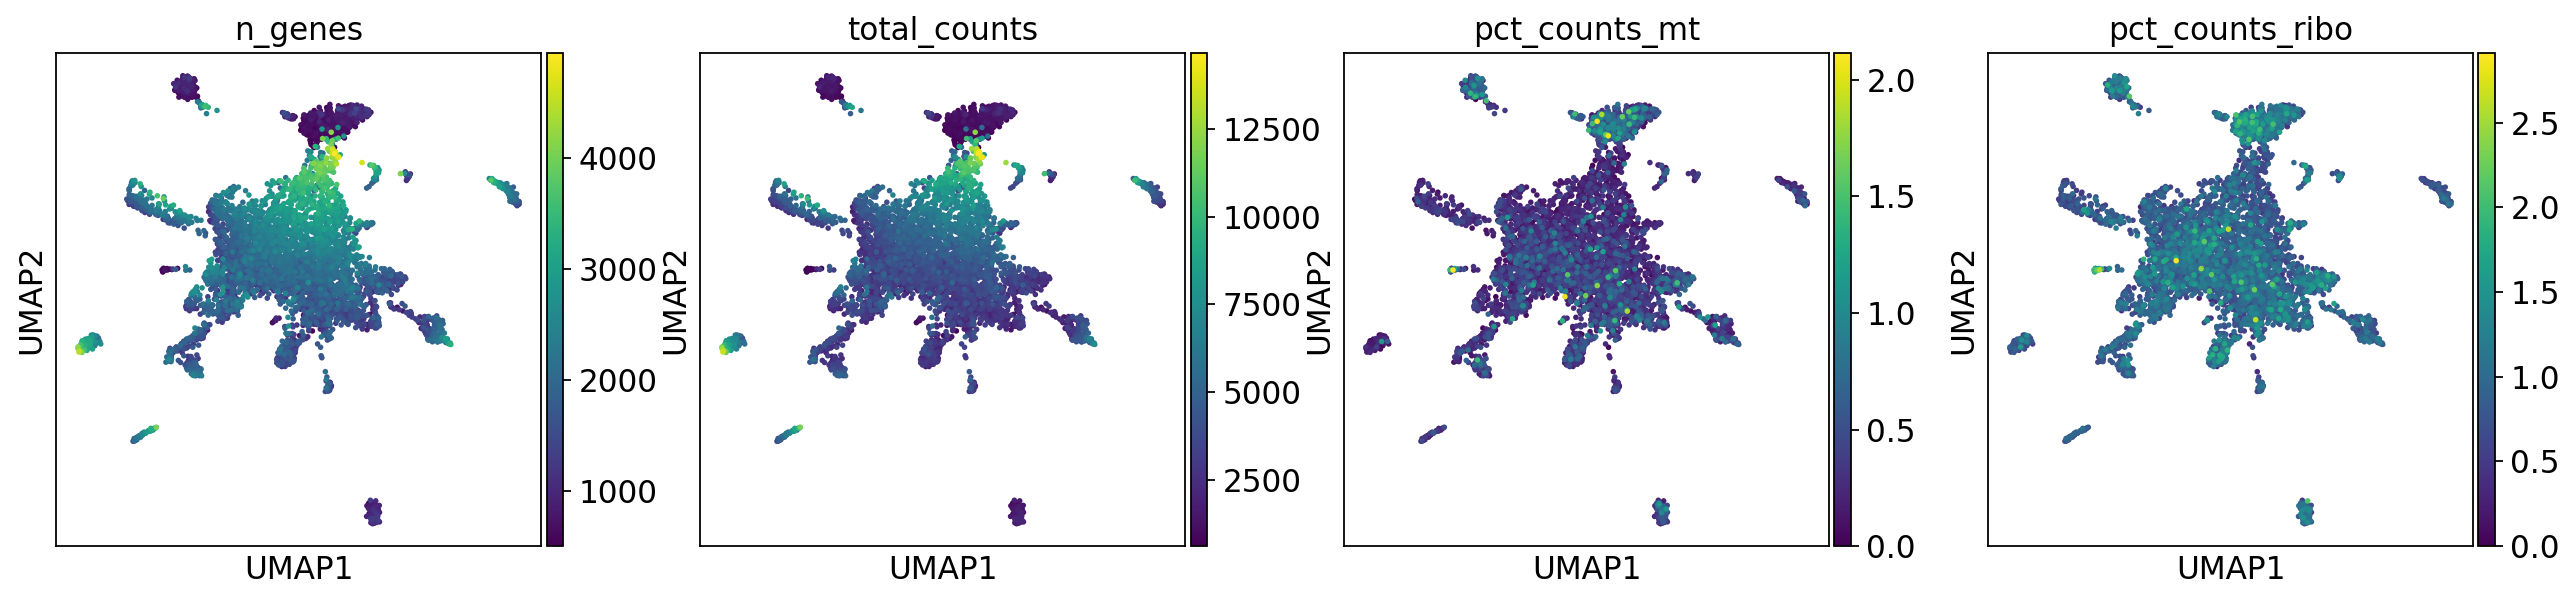

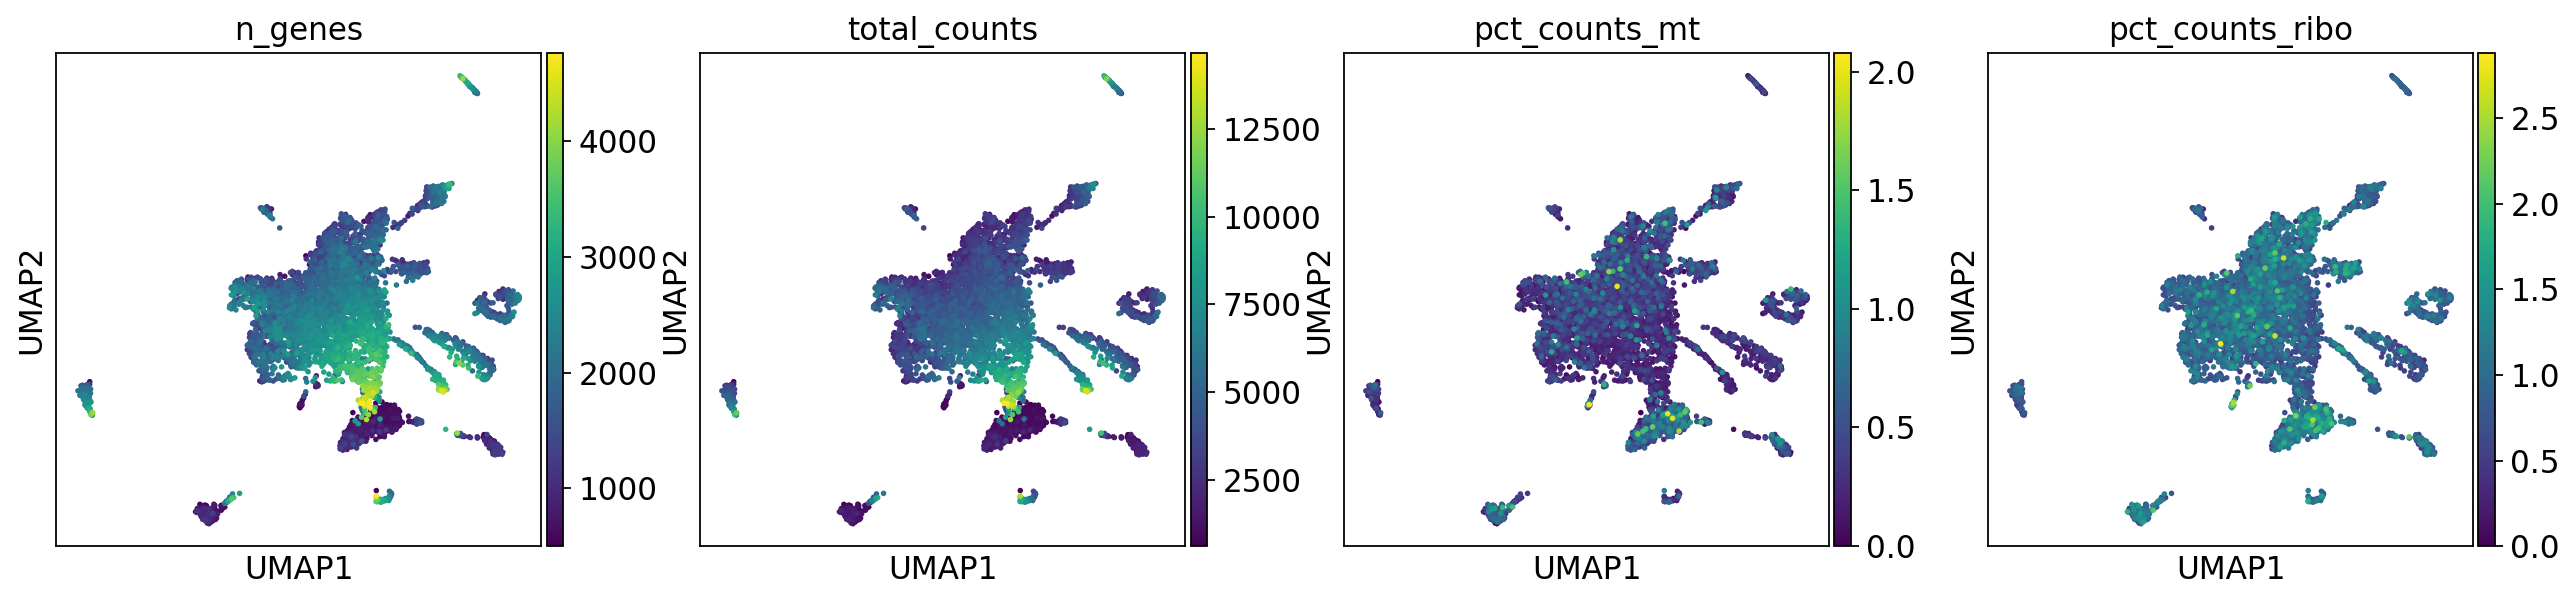

In [131]:
for i in range(numberobj):
    sc.pl.umap(locals()[object_names_reg[i]], color=['n_genes', 'total_counts', 'pct_counts_mt','pct_counts_ribo'], use_raw=True, s=25,
           save = "_"+object_names_reg[i]+"_umap_n"+str(nn)+"_1.pdf")

### Plot with marker genes

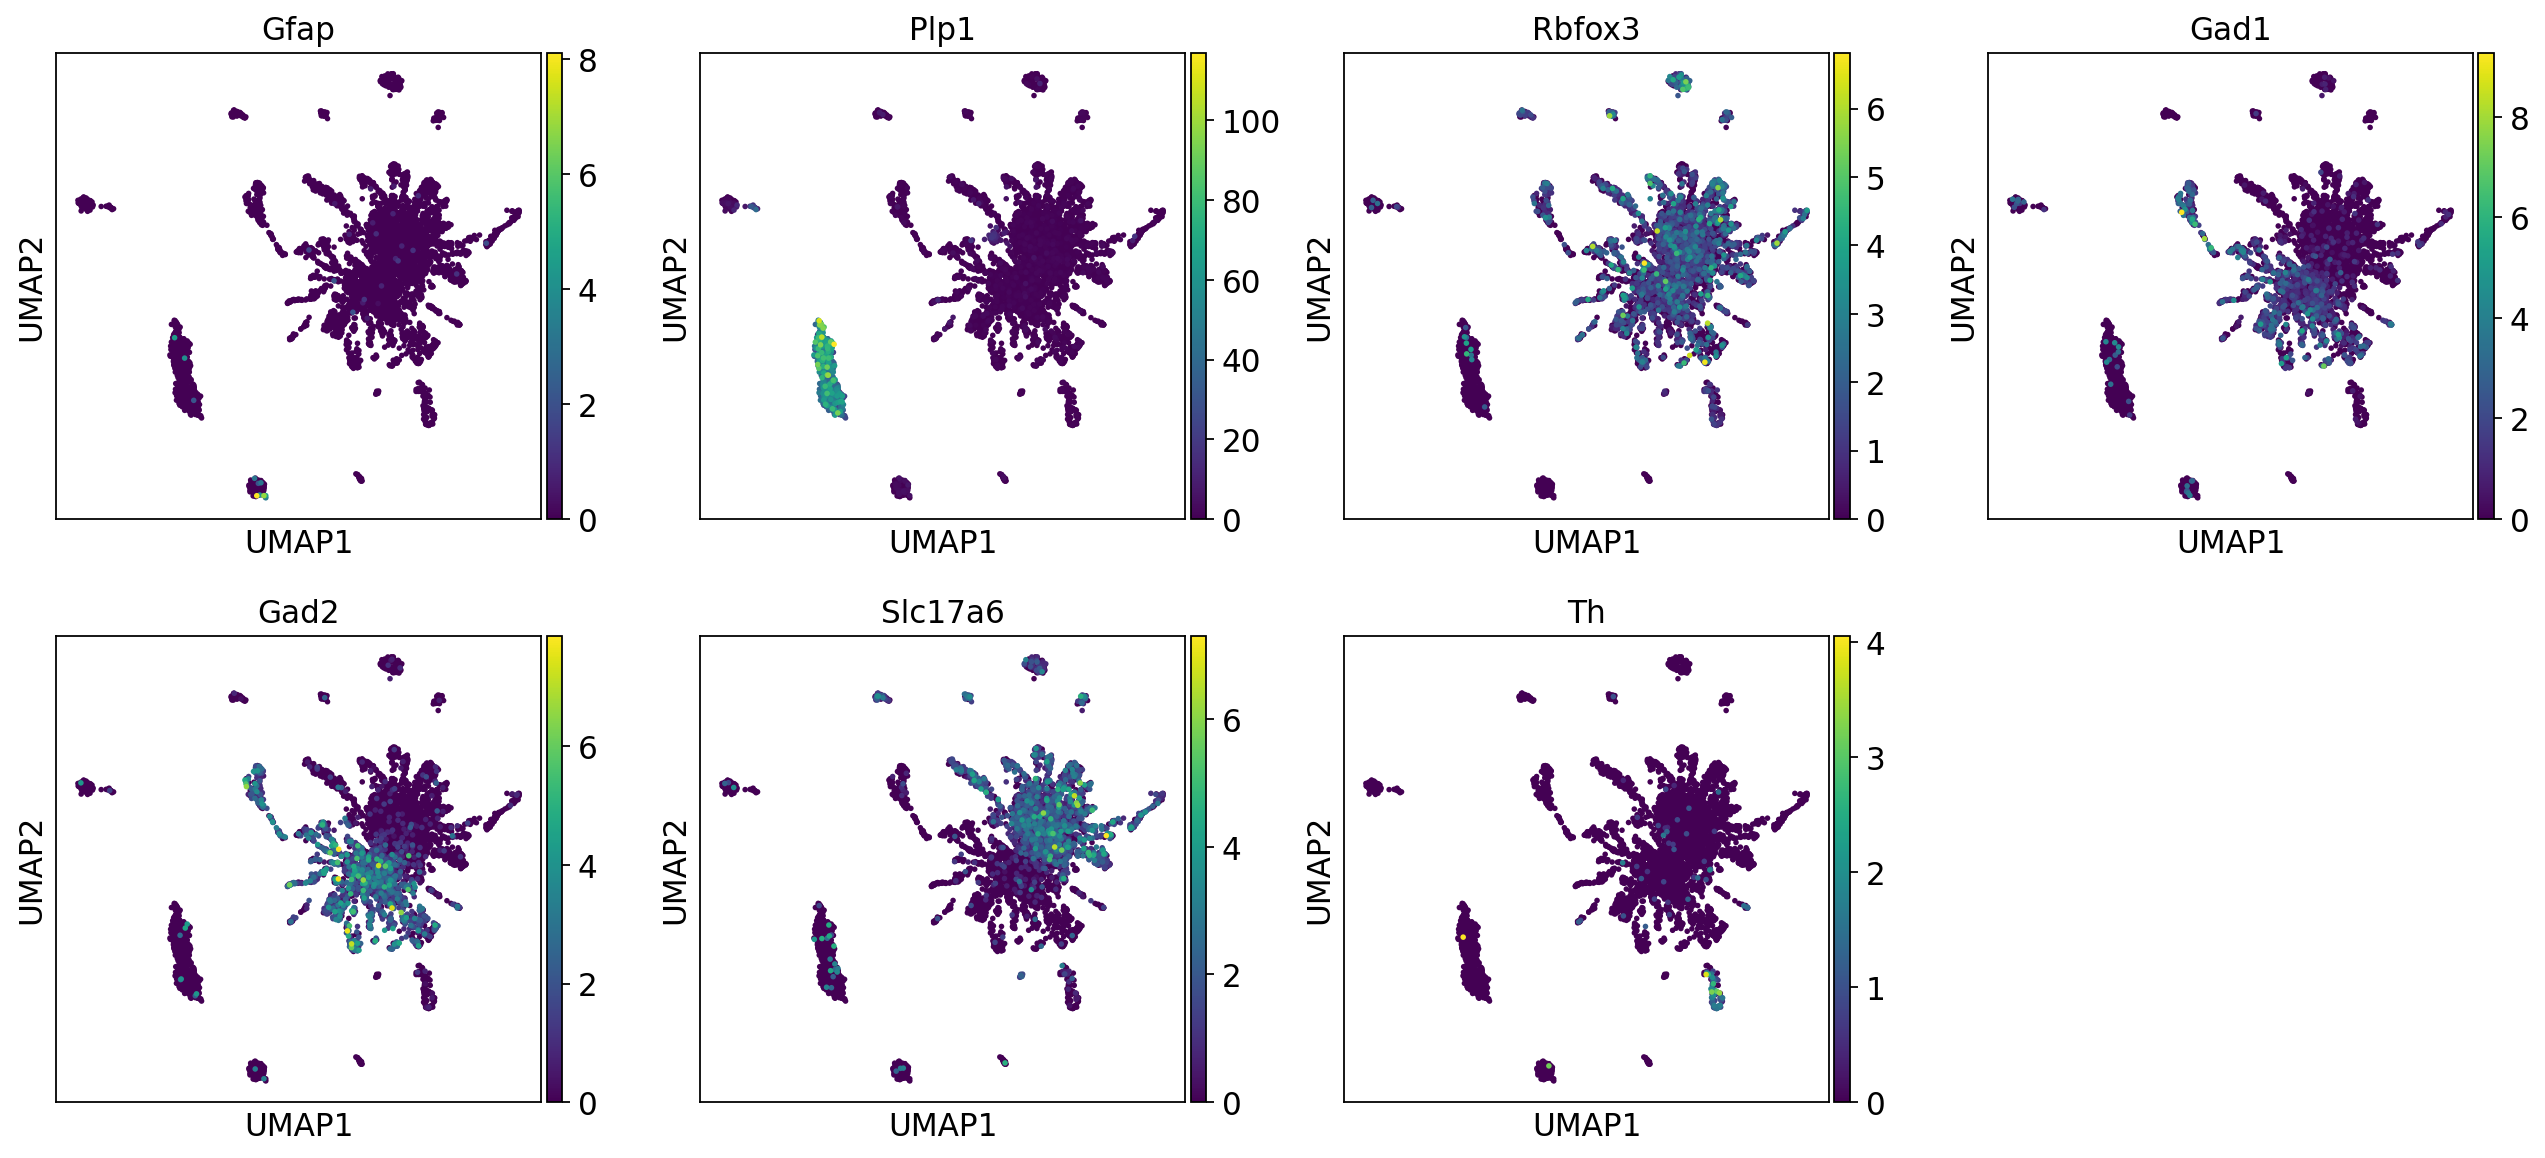

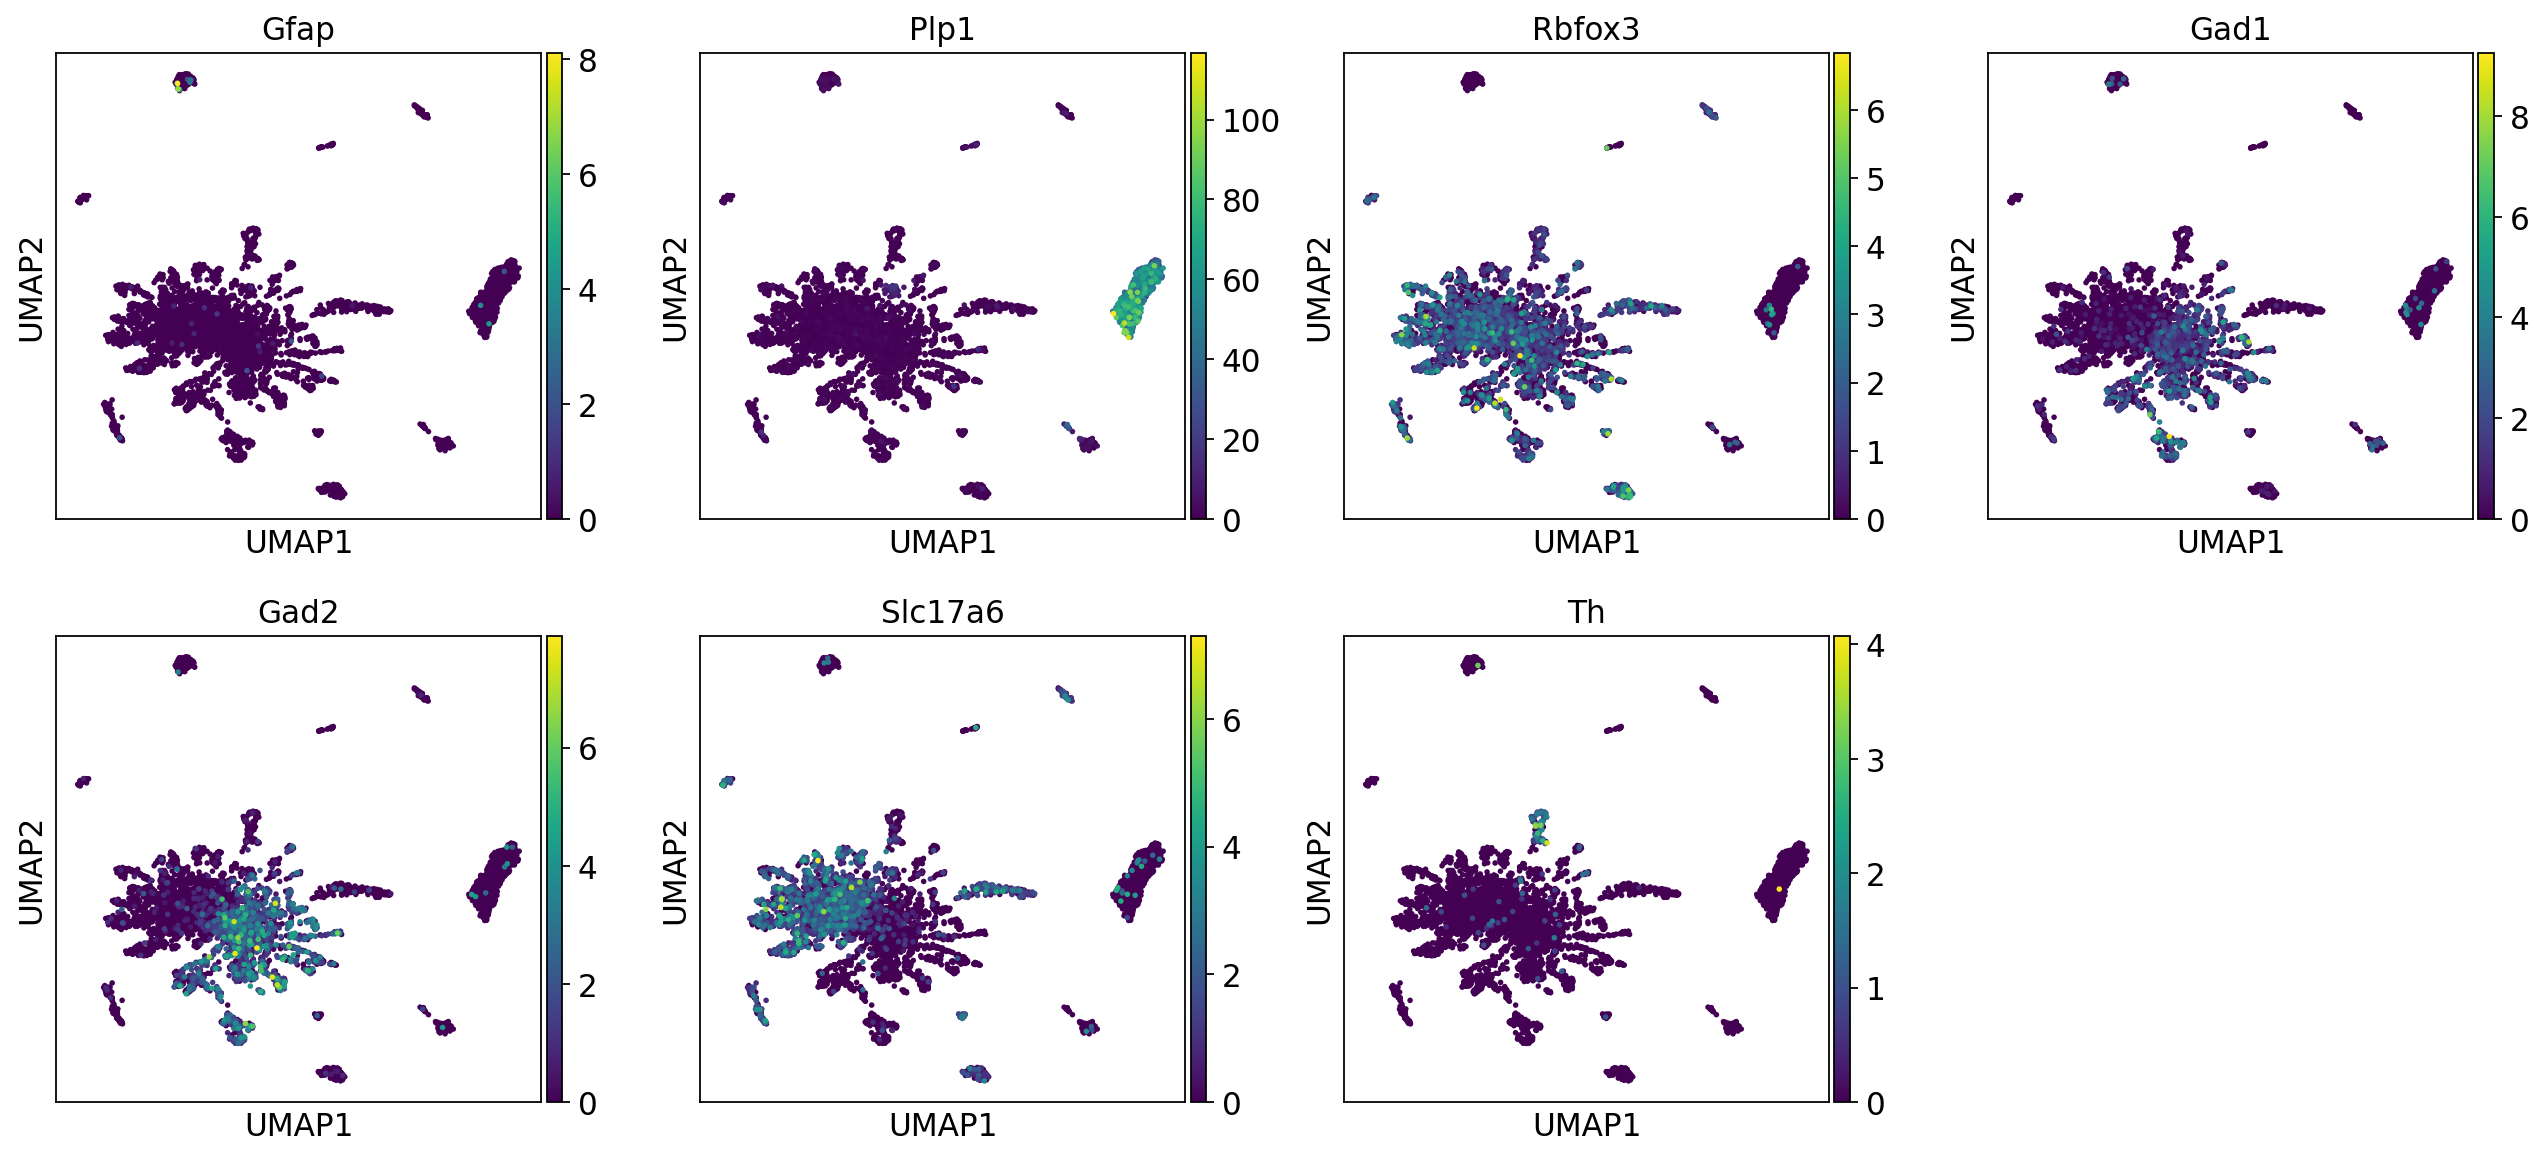

In [132]:
for i in range(numberobj):
    if locals()[object_names_filtered[i]].obs['species'][0] == 'Homo sapien':
        sc.pl.umap(locals()[object_names_filtered[i]], color=['GFAP', 'PLP1', 'RBFOX3','GAD1','GAD2', 'TH','SLC17A6'], use_raw=True, s=25,
           save = "_"+object_names_filtered[i]+"_umap_n"+str(nn)+"_2.pdf")
    else:
        sc.pl.umap(locals()[object_names_filtered[i]], color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2', 'Slc17a6','Th'], use_raw=True, s=25,
           save = "_"+object_names_filtered[i]+"_umap_n"+str(nn)+"_2.pdf")

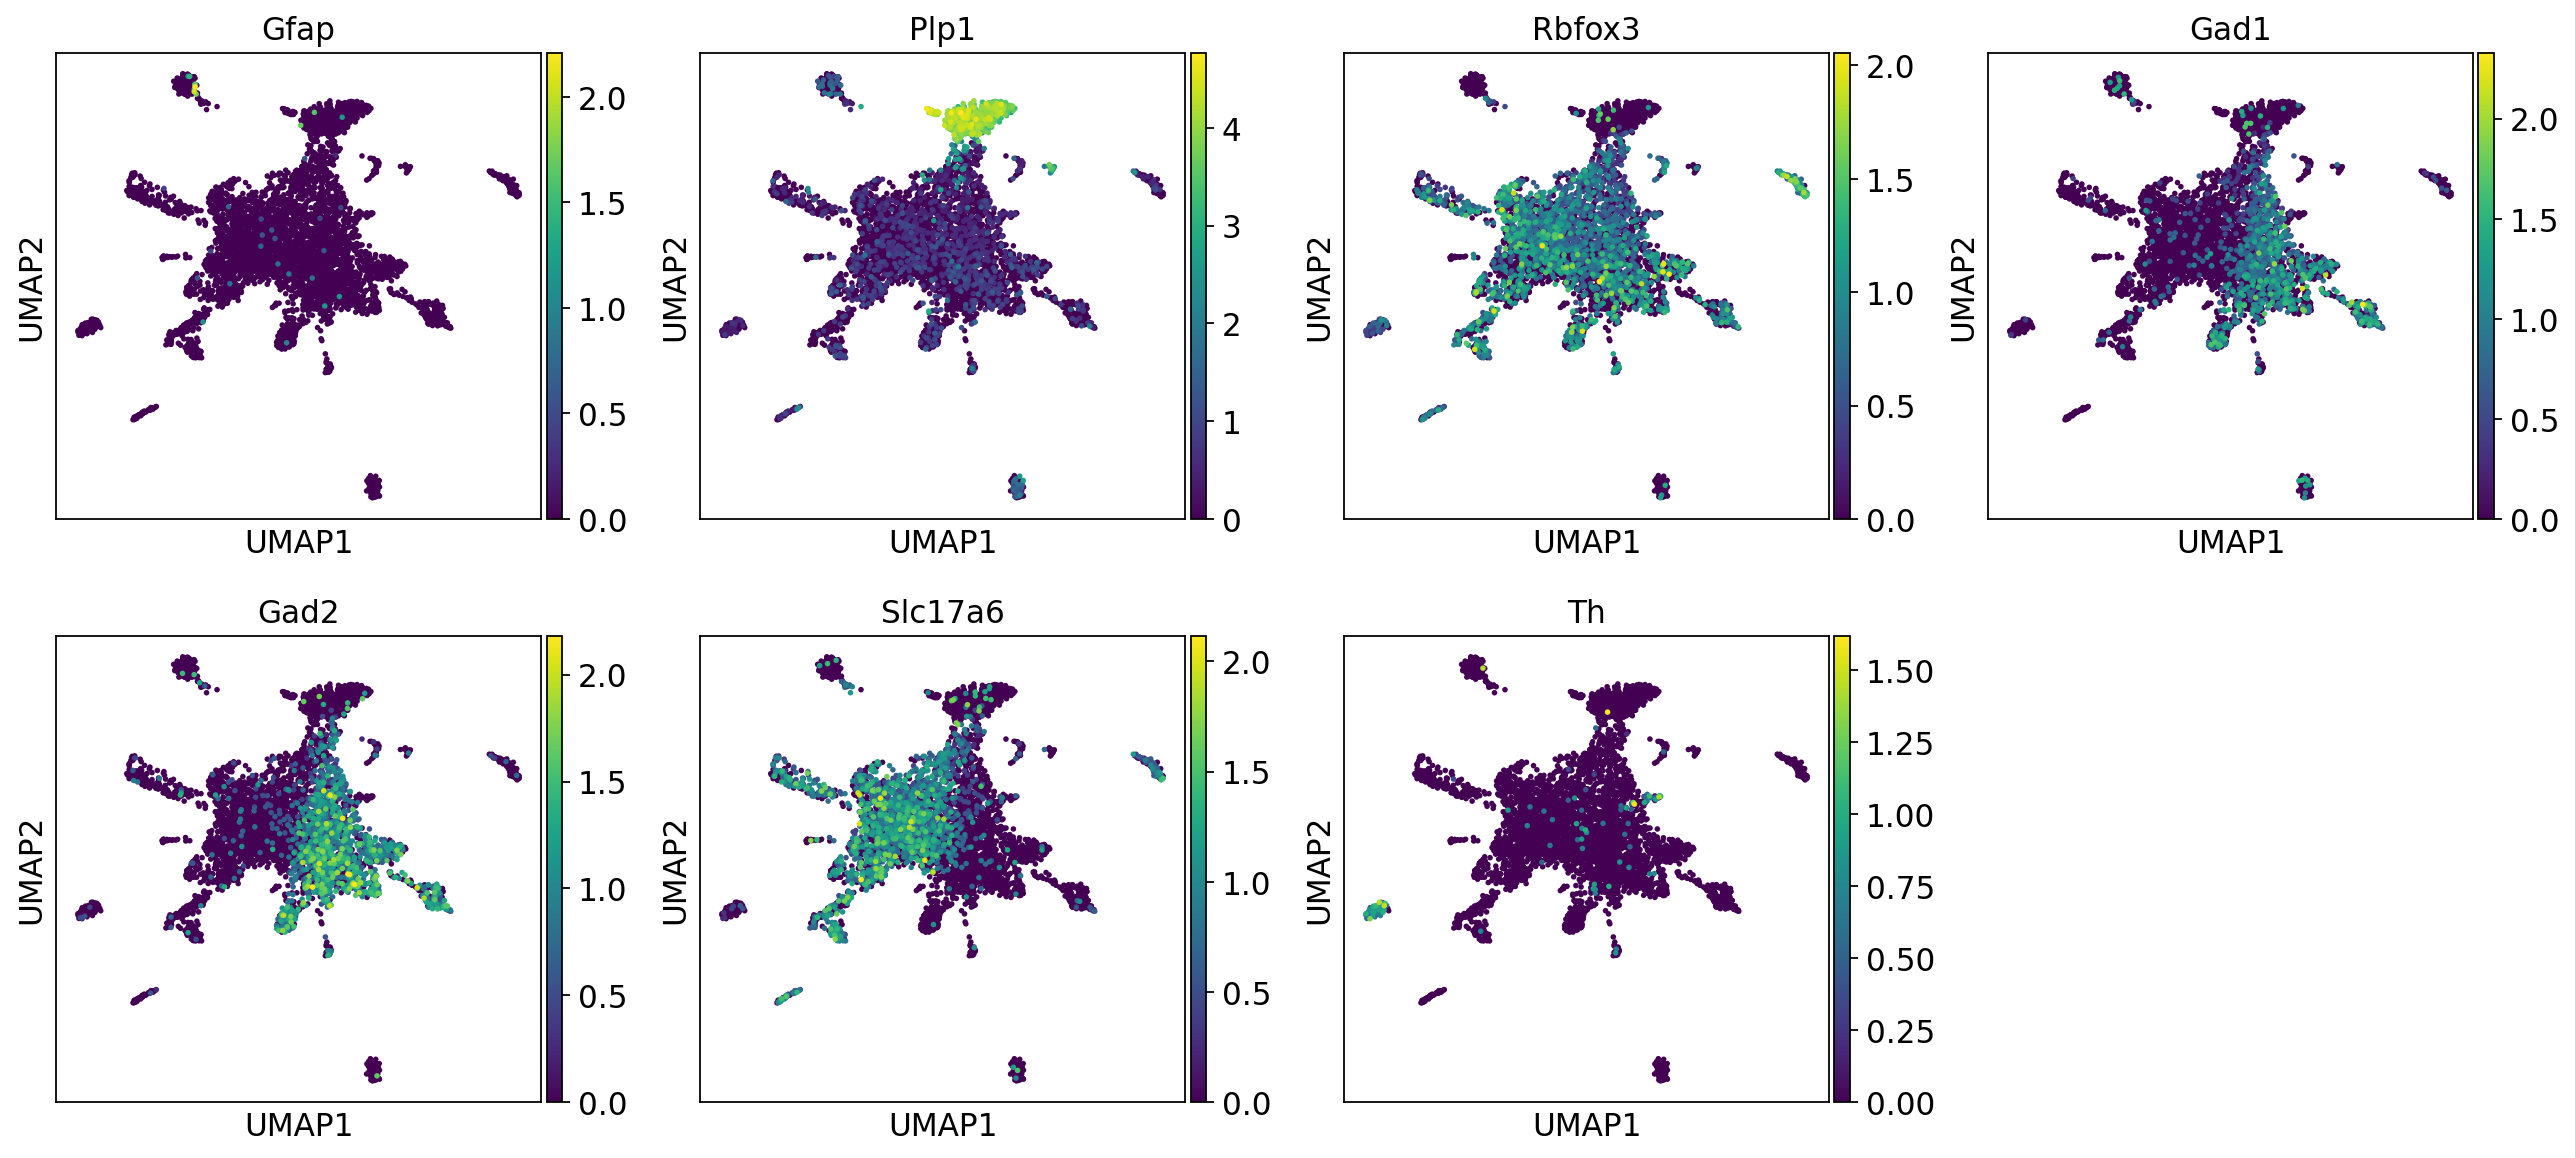

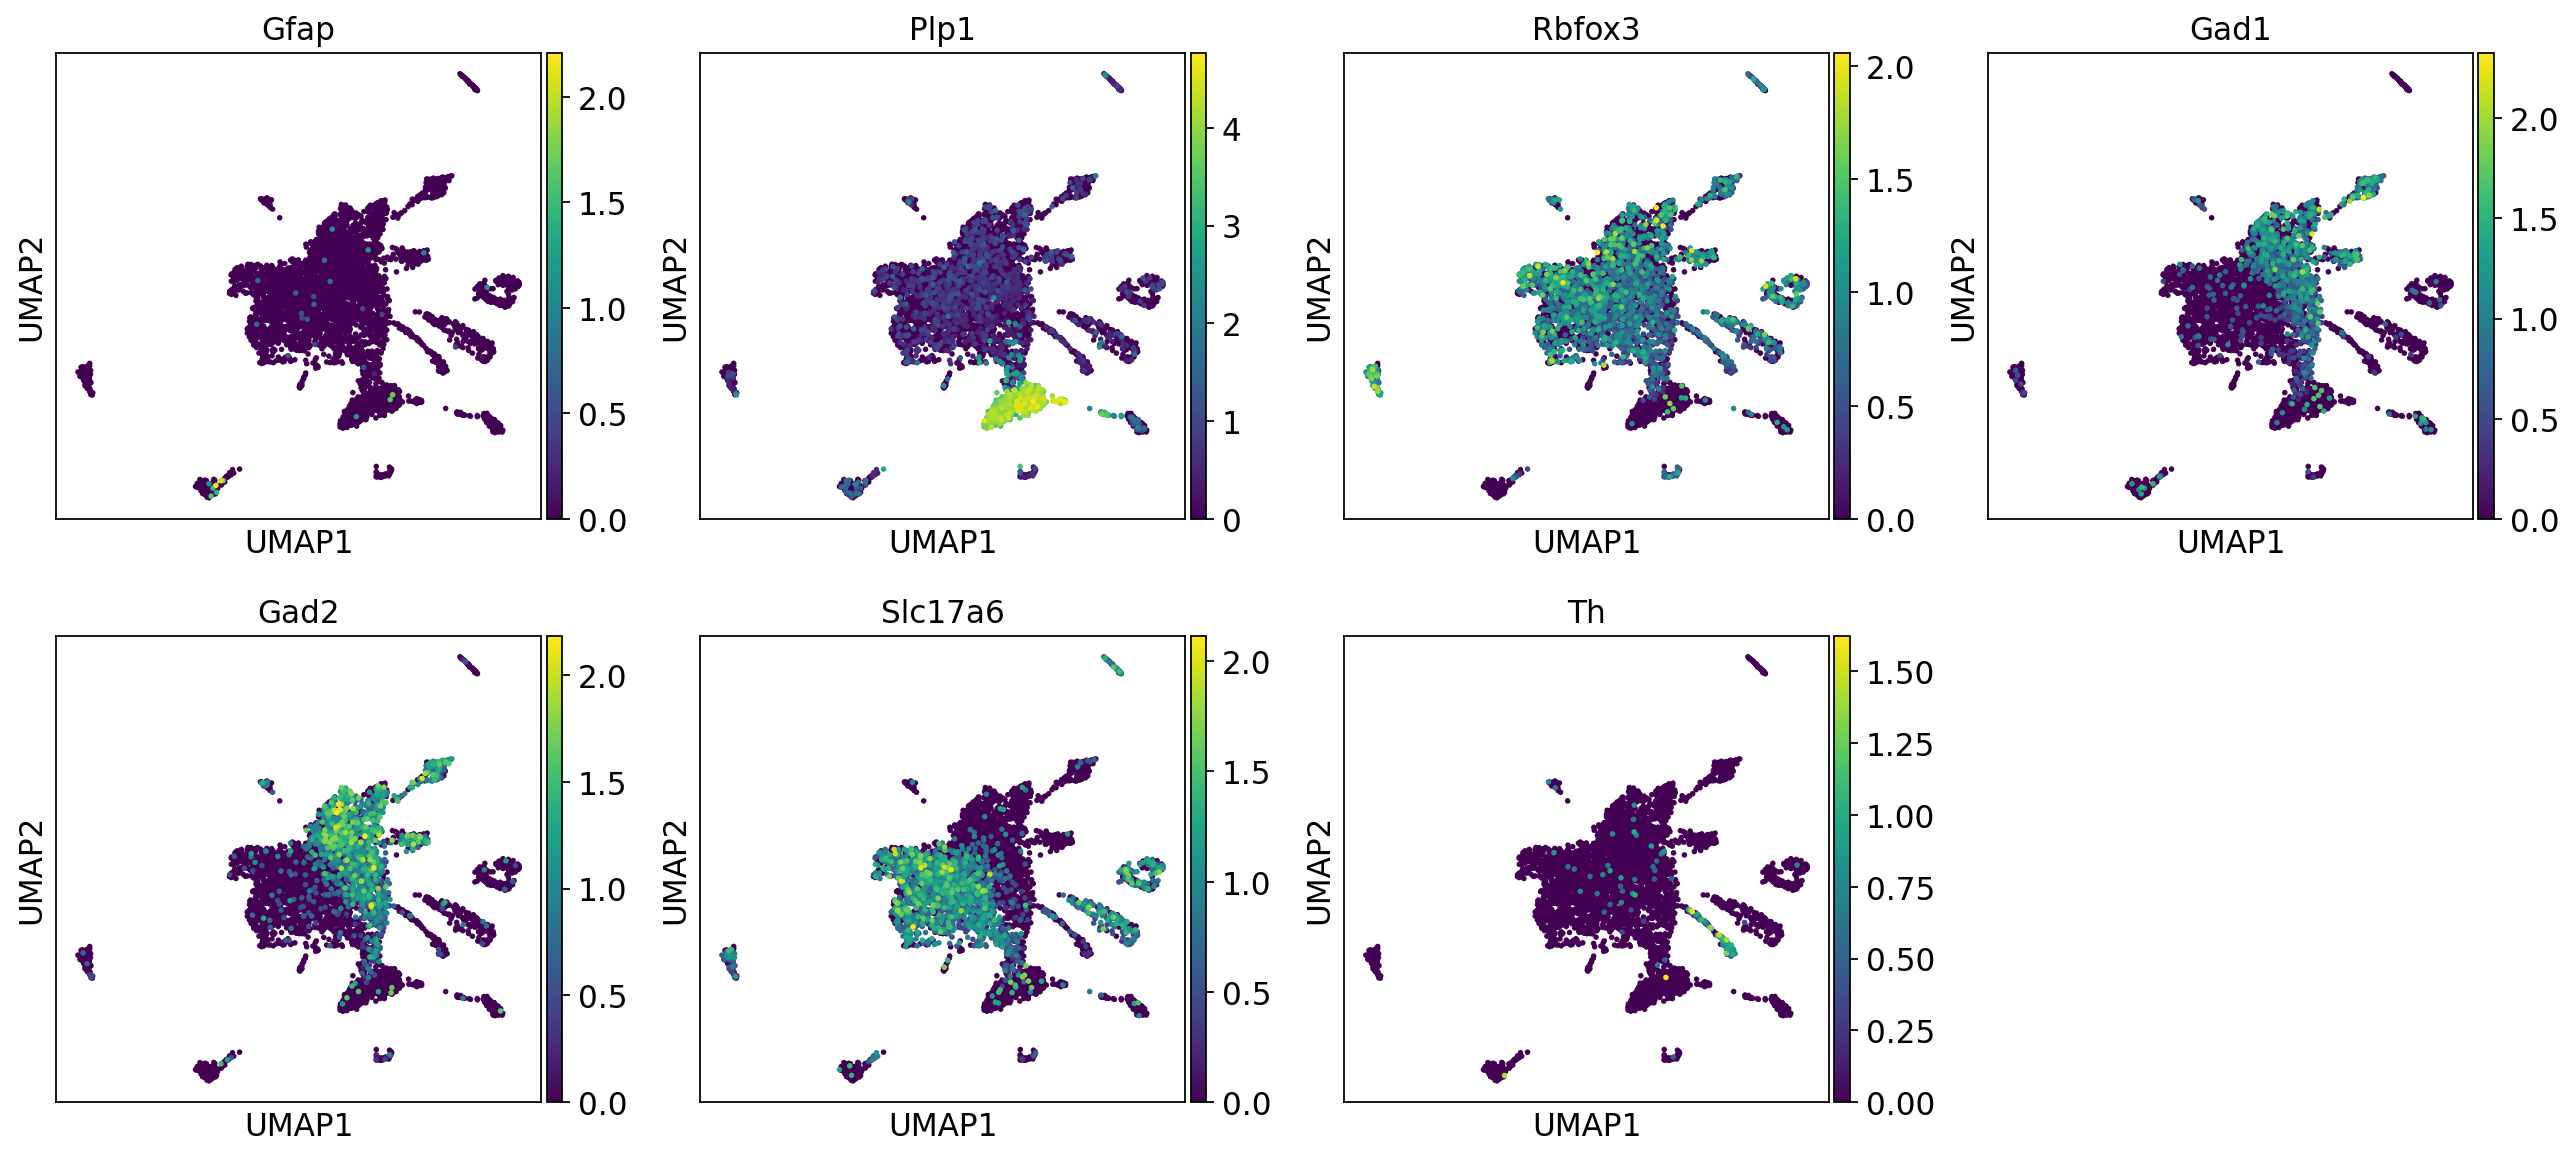

In [133]:
for i in range(numberobj):
    if locals()[object_names_reg[i]].obs['species'][0] == 'Homo sapien':
        sc.pl.umap(locals()[object_names_reg[i]], color=['GFAP', 'PLP1', 'RBFOX3','GAD1','GAD2', 'TH','SLC17A6'], use_raw=True, s=25,
           save = "_"+object_names_reg[i]+"_umap_n"+str(nn)+"_2.pdf")
    else:
        sc.pl.umap(locals()[object_names_reg[i]], color=['Gfap', 'Plp1', 'Rbfox3','Gad1','Gad2', 'Slc17a6','Th'], use_raw=True, s=25,
           save = "_"+object_names_reg[i]+"_umap_n"+str(nn)+"_2.pdf")

In [134]:
!ls figures

pca_adata_CNR0176487_new_filtered_intron_metrics_1.pdf
pca_adata_CNR0176487_new_filtered_metrics_2.pdf
pca_adata_CNR0176487_new_filtered_reg_intron_metrics_1.pdf
pca_adata_CNR0176487_new_filtered_reg_metrics_2.pdf
pca_adata_CNR0176487_old_filtered_intron_metrics_1.pdf
pca_adata_CNR0176487_old_filtered_metrics_2.pdf
pca_adata_CNR0176487_old_filtered_reg_intron_metrics_1.pdf
pca_adata_CNR0176487_old_filtered_reg_metrics_2.pdf
umap_adata_CNR0176487_new_filtered_reg_umap_n10_1.pdf
umap_adata_CNR0176487_new_filtered_reg_umap_n10_2.pdf
umap_adata_CNR0176487_new_filtered_reg_umap_n15_1.pdf
umap_adata_CNR0176487_new_filtered_reg_umap_n15_2.pdf
umap_adata_CNR0176487_new_filtered_reg_umap_n51_1.pdf
umap_adata_CNR0176487_new_filtered_reg_umap_n51_2.pdf
umap_adata_CNR0176487_new_filtered_umap_n10_1.pdf
umap_adata_CNR0176487_new_filtered_umap_n10_2.pdf
umap_adata_CNR0176487_new_filtered_umap_n15_1.pdf
umap_adata_CNR0176487_new_filtered_umap_n15_2.pdf
umap_adata_CNR0176487_new_filtered_umap_n51_1.pd

### Save
nn =15

In [135]:
for i in range(numberobj):
    locals()[object_names_filtered[i]].write(os.path.join('./'+object_names_filtered[i][6:20]+'_processed.h5ad'))
    locals()[object_names_reg[i]].write(os.path.join('./'+object_names_reg[i][6:14]+'_reg_processed.h5ad'))